<a href="https://colab.research.google.com/github/Tiao553/Projects_Data_Science/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Analisando Airbnb" width="115%" src="https://raw.githubusercontent.com/Tiao553/Projects_Data_Science/main/img/Capa_riod.png"></center>

*by **Sebastião Ferreira de Paula Neto** .* 

Este notebook foi realizado com intuido de analisar a violência no estado do Rio de janeiro desde o ano de 1991.

> # **Para isso vamo começar falando sobre ele:**

# **Rio de Janeiro**

Rio de Janeiro o estado que **conta com uma das megalópoles da america do sul**(extensa região urbanizada, constituída por várias metrópoles e regiões metropolitanas conurbadas) a sua capital, a sua **economia é a segunda maior brasileira**. Isto se deve a sua alta densidade de industrias e sua caracteristicas culturais e geograficas que propocionam uma das cidades brasileiras com **maior indice de turistas.**

<center><img alt="Violencia RIo" width="75%" src="https://www.cause.gov.br/wp-content/uploads/2019/01/rio-de-janeiro-cristo-redentor.jpg"></center>


A sua capital cujo nome também é Rio de janeiro é carinhosamente chamada de **"Cidade maravilhosa"** devido a inúmeros locais de turismo. O mais conhecido local de turismo é o **cristo rendetor, com o título de uma das 7 maravilhas mundiais.** Emobora este seja um dos locais mais requisitados por turistas ao visitar a **Cidade maravilhosa**, as favelas vem ganhando muito espaço por parte dos turistas segundo o jornal [O globo](https://oglobo.globo.com/rio/mais-da-metade-dos-turistas-quer-conhecer-favelas-do-rio-7349831#:~:text=No%20Gale%C3%A3o%2C%20mais%20da%20metade,3%25%2C%20entre%20os%20estrangeiros.). 

Falando nelas, durante muito tempo foi formulado um estereótipo que acreditava que a fama de uma **cidade violênta** era resposável por elas. Embora atualmente elas sejam requisitadas como turismo, **será verdade que toda esta resposabilidade possui algum fundamento?**



>## **Nada melhor que analisarmos a história para buscar respostas.**







## **História das Favelas**

<center><img alt="Violencia RIo" width="85%" src="https://observatorio3setor.org.br/wp-content/uploads/2019/12/1-favela.jpg"></center>


No Inicio do século XX, a cidade do rio de janeiro passou por reformulações urbanas como a reforma da avenida central que proporcionou uma migração interna da população para os arredores da cidade e para construções irregulares recém-formadas.**Esta migração foi o início, no Rio de janeiro, do que conhecemos hoje como Favelas.** Estes locais eram vistos como região de criminalidade, doenças e nem ao menos eram reconhecidos pela sociedade. 

Durante o regime militar foram instituídas práticas para desocupação destas áreas, que não foram bem sucedidas, segundo o estado, e **resultou 139 mil habitantes removidos das favelas.** Esta Prática do estado além de proporcionar um enorme inchaço populacional em outros locais, ainda tornou essas e as antigas áreas ainda mais violetas.

 Sem emprego e com alta densidade de pessoas surgiram neste locais centros de narcotráfico como rentabilidade e controle, **o que favoreceu que locais já violentos tornassem ainda mais.**

Práticas de urbanização e de segurança foram adotadas, no entanto ainda é possível visualizar estes locais ainda mais violentas. 

Segundo dados do [Ipea](https://www.ipea.gov.br/atlasviolencia/)(Instituto de Pesquisa Econômia Aplicada) em seu projeto *"Atlas da violência"* reuniu dados desde o ano de $1980$ e em suas análises mostra o rio de janeiro **em sua maior parte como local mais violento do país.** 

Esta estatística ocorreu por meio do que chamamos de **Guerra do tráfico**.Todas essas caracteristicas carregam particularidades que podem ser interpretadas como uma **cidade violenta**. 

##  **Embora o governo tenha realizado práticas para contornar toda essas estatísticas, você poderia afirma, com toda certeza, que o Rio de Janeiro é ainda uma das cidades violenta do pais?**

> # Pelo menos em dúvida você ficaria e se você respondeu **SIM** estaria errado.

####Com base no **datasus**(departamento de informatica do SUS) em conjunto ao **departamento de segurança nacional** que avaliam o número de homicídios, **o Rio de janeiro é sexto em ranking de homicídios** ficando atrás de Bahia,  Minas Gerais, Pernambuco, São Paulo e Pará. Além disso des o ano de 2008 seus números so decaem.


>> **Conquanto a cidade seja considerada violenta, onde se encontra toda esta violência descrita? Essa e outra perguntas que desejamos responder com este notebook**






---
# **Objetivos**

Com base no argumentado gostaríamos de verificar a distribuição da violencia no estado do Rio de Janeiro e  a interferência do Covid-19 com as ocorrências criminosas. Dessa forma tomaremos como objetivo neste notebook a seguinte sequência:

1. **Fazer a limpeza nos dados para que não haja nenhum inferência na análise.**
2. **Realizar uma análise similaridade entre os dados.**
3. **Comparar com dados de outros anos e verificar a evolução.**



---
# **Obtenção e processamento dos dados**

**O Instituto de violência Pública(ISP)** do Rio de janeiro realiza a coleta dos casos ocorridos no estado. Estes estão disponíveis para acesso de dados abertos em seu [Site](http://www.ispdados.rj.gov.br/estatistica.html).

Os dados coletados por meio de Registros de Ocorrência(RO). Para verificação antes de disponibilizados os dados **são submetidos a um controle de qualidade onde são submetidos à Corregedoria Interna da Polícia Civil (COINPOL).**

Com os dados coletados, ainda é possível verificar um dashbord, forma de apresentação interativa com o usuário, que relaciona crimes com regiões do estado. Este pode ser acessado por meio do [Link](http://www.ispvisualizacao.rj.gov.br/index.html).

Ao acessar o site é possível visualizar diversos conjuntos de dados e para essa análise vamos utilizar o conjunto de dados `"Estatísticas de segurança: série histórica mensal no estado desde 01/1991"` que se apresenta no formato `csv`.

Portanto, vamos fazer a importação das bibliotecas para suscitar a manipulação e análises dos dados:


In [2]:
#   importando os pacotes necessários
import warnings
warnings.filterwarnings('ignore')

#   Manipulando dados e visualização
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

#   Configurando a visualização
sns.set_style("whitegrid")
%matplotlib inline

## **Iniciando análise incial**

### **Nesta análise inicial iremos avaliar a qualidade dos dados e, se necessário, o que pode ser feito para deixa-los melhores.**

Esta fase chamamos de **preprocessamento** de dados. Sendo assim podemos agora importar os dados:

In [3]:
#   Importando os dados iniciais
Data = "https://raw.githubusercontent.com/Tiao553/Projects_Data_Science/main/datas/Vilence_Rio.csv"
df = pd.read_csv(Data)

#   convertendo meses em formato numerico para string
mes = pd.Series(['jan','feb','mar','apr','may','jan','jul','aug','sep','oct','nov','dez'])
mes.index = [1,2,3,4,5,6,7,8,9,10,11,12]
k = 0  
for i, value in enumerate(df.mes):
    if value == mes.index[k]:
        df.mes[i] = mes[k+1]
        if k < 11:
            k += 1
        else:
            k = 0 

Antes de iniciar qualquer análise, vamos verificar a "cara" do nosso *dataset*, analisando as 5 primeiras entradas e as 5 ultimas entradas:

In [ ]:
display(df)

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,jan,657,NaN,15,NaN,NaN,672,162,3051,NaN,NaN,NaN,967,NaN,381,1348,1174,63,350,188,37,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,3
1,1991,feb,732,NaN,17,NaN,NaN,749,175,3421,NaN,NaN,NaN,963,NaN,432,1395,1097,64,357,171,35,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3
2,1991,mar,713,NaN,25,NaN,NaN,738,216,3613,NaN,NaN,NaN,963,NaN,422,1385,1265,71,443,191,43,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,3
3,1991,apr,634,NaN,20,NaN,NaN,654,200,3211,NaN,NaN,NaN,1186,NaN,354,1540,1415,81,425,199,36,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,3
4,1991,may,650,NaN,20,NaN,NaN,670,146,3051,NaN,NaN,NaN,931,NaN,335,1266,1449,82,553,231,27,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020,sep,239,3.0,7,249.0,54.0,303,343,4560,481.0,171.0,1675.0,3567,1319.0,582,5468,1742,323,294,61,0,4.0,2.0,57.0,27.0,1146,9124,1065,698,379.0,823.0,132.0,5888,8985,1.0,105.0,5.0,4086.0,1984,974.0,890.0,150.0,1173,2497.0,455.0,1059.0,37.0,4094.0,297.0,22,1.0,0.0,0.0,48732.0,3
357,2020,oct,274,2.0,5,281.0,145.0,426,405,4602,452.0,168.0,1841.0,3971,1283.0,768,6022,1899,358,289,49,0,0.0,6.0,51.0,15.0,1239,9928,1058,813,431.0,1005.0,157.0,5864,9328,0.0,105.0,11.0,4593.0,2019,972.0,910.0,173.0,1212,2787.0,369.0,993.0,37.0,4194.0,297.0,24,4.0,2.0,0.0,50772.0,2
358,2020,nov,324,2.0,8,334.0,80.0,414,400,4620,467.0,173.0,1780.0,3763,1301.0,707,5771,2083,331,273,71,1,2.0,7.0,64.0,12.0,1294,9909,1052,837,395.0,1017.0,148.0,5402,8851,1.0,107.0,7.0,3723.0,1738,803.0,820.0,147.0,1273,2629.0,381.0,642.0,37.0,4055.0,316.0,19,3.0,1.0,1.0,47940.0,2
359,2020,dez,279,2.0,8,289.0,79.0,368,322,4672,424.0,186.0,1656.0,3544,1273.0,715,5532,2300,459,324,75,0,4.0,6.0,68.0,24.0,1368,10160,1111,807,318.0,1018.0,157.0,5508,8919,0.0,112.0,5.0,3541.0,1709,784.0,827.0,133.0,1190,2673.0,360.0,906.0,40.0,4116.0,308.0,20,0.0,1.0,1.0,47842.0,2


Podemos descorrer algumas análises, como:
* Os dados estão **distribuidos** em formato de contagem de ocorrências, **dado mês e ano.**
* **As contagens são categorizadas** por crime, indicadores e informações relevantes.
* **A muitos valores faltantes `NaN`,** precisamo definir como trabalhar com eles, assim como eles são coletados ou, se possível, ate mesmo que informções eles podem nos asseguarar.
* Outra característica é o fato de que cada entrada corresponde a 1 mês de dados coletados.

Dessa forma vamos buscar agora informações quantitativas sobre esses dados. 

In [ ]:
#   Indentificando os tipos das variaveis
print("\t Tipos por feature:")
print(' ')
df.dtypes

	 Tipos por feature:
 


ano                             int64
mes                            object
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
cvli                          float64
hom_por_interv_policial       float64
letalidade_violenta             int64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_transeunte                int64
roubo_celular                 float64
roubo_em_coletivo               int64
roubo_rua                       int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_comercio                  int64
roubo_residencia                int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubo

* Com esta análise podemos verificar que os tipos da váriaveis são compatíveis com as características demonstradas.

Podemos proseguir, como os dados ja se encontram no formato correto.Sendo assim vamos **avaliar os valores faltantes:**



In [ ]:
#   Verificando a porcentagem de valores faltantes

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False) [:33]

furto_bicicleta               0.764543
roubo_bicicleta               0.764543
posse_drogas                  0.498615
cmba                          0.498615
cmp                           0.498615
aaapai                        0.498615
apf                           0.498615
apreensao_drogas_sem_autor    0.498615
trafico_drogas                0.498615
roubo_cx_eletronico           0.398892
roubo_apos_saque              0.398892
extorsao                      0.398892
sequestro_relampago           0.398892
estelionato                   0.398892
roubo_conducao_saque          0.398892
furto_celular                 0.398892
furto_coletivo                0.398892
estupro                       0.398892
pol_militares_mortos_serv     0.398892
pol_civis_mortos_serv         0.398892
pessoas_desaparecidas         0.365651
encontro_ossada               0.365651
roubo_celular                 0.299169
lesao_corp_culposa            0.265928
registro_ocorrencias          0.265928
sequestro                

Trinta "features" aprensentam valores faltantes. **Como são valores contabilizados você poderia pensar:**

<center>

### "Basta adicionar zero em tudo, já que são todos faltantes"</center>

**Ou mesmo:**
<center>

### "Utilize alguma forma de remover linhas ou colunas" 

# **NÃO FAÇA ISSO**</center>

Seria muito bacana supor que não foram contabilizados todos este valores, mas não é possivel acessar este valor. Dessa maneira, não podemos supor que ele seja zero, ou até mesmo remover. Já que estes valores podem simplismente não ter sido contabilizados e alguns destes represeta boa parte do dataset.

# OBSERVAÇÃO:
>>> Em muitos casos essa prática seria muito impostante para gestão dos dados e análise, **mas neste contexto não é possivel pois podemos enviezar a análise.**

**Pensando nisso vamos avaliar a cada ano a evolução de cada features, ou seja verificar a cada ano quantas vezes foram contabilizados valores faltantes. Dessa forma, como a contagem é feita por meses caso apareça $12$ representa que não foi contabilizada naquele ano a ocorrência, logo:**

In [ ]:
# dados ausentes por ano

df.set_index('ano').isnull().sum(level=0)

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,0,0,12,0,12,12,0,0,0,12,12,12,0,12,0,0,0,0,0,0,0,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1992,0,0,12,0,12,12,0,0,0,12,12,12,0,12,0,0,0,0,0,0,0,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1993,0,0,12,0,12,12,0,0,0,12,12,12,0,12,0,0,0,0,0,0,0,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1994,0,0,12,0,12,12,0,0,0,12,12,12,0,12,0,0,0,0,0,0,0,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1995,0,0,12,0,12,12,0,0,0,12,12,12,0,12,0,0,0,0,0,0,0,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1996,0,0,12,0,12,12,0,0,0,12,12,12,0,12,0,0,0,0,0,0,0,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1997,0,0,12,0,12,12,0,0,0,12,12,12,0,12,0,0,0,0,0,0,0,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1998,0,0,12,0,12,0,0,0,0,12,0,12,0,12,0,0,0,0,0,0,0,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,12,0
1999,0,0,0,0,0,0,0,0,0,12,0,0,0,12,0,0,0,0,0,0,0,12,12,12,12,0,0,0,0,12,12,12,0,0,0,12,12,12,0,12,12,12,0,12,12,12,12,0,12,0,12,12,12,0,0


Análisando a tabela gerada temos:
* Em média as *features* abaixo apresentam valores não adiciados até o ano de 1998.
> `lesao_corp_morte`, `hom_por_interv_policia`, `hom_culposo`, `lesao_corp_culposa`, `roubo_celular`, `registro_ocorrencias`, `ameaca` e `sequestro`.
* Em média as *features* abaixo apresentam valores não adiciados até o ano de 2003.
> `pol_civis_mortos_serv`, `pol_militares_mortos_serv`, `encontro_ossada`, `pessoas_desaparecidas`, `extorsao`,	`sequestro_relampago`, `estelionato`, `furto_coletivo`,	`furto_celular`, `roubo_conducao_saque` e  `roubo_apos_saque`.
* Em média as *features* abaixo apresentam valores não adiciados até o ano de 2006.
> `aaapai`,	`cmp`, `cmba`, `apf`, `apreensao_drogas_sem_autor`, `posse_drogas` e	`trafico_drogas`.
* Em média as *features* abaixo apresentam valores não adiciados até o ano de 2013.
> `furto_bicicleta` e `roubo_bicicleta`.

### **Dessa forma podemos verificar que como uma linha do tempo os dados passaram a ser relevantes e assim sendo adicionados.**

>> Considerando o fato de que é possível acessar todos os dados apartir de 2014 a maior parte das análises vamos considerar por meio desta data e análises pontuais utilizamos o dados completos.


In [ ]:
#       Criando o Dataframe a partir de 2014

df_2014p = df[df.ano >= 2014]

#       Verificando a porcentagem de valores faltantes
print("\n \tVerificando os valores faltantes para provar a análise: \n")
(df_2014p.isnull().sum()/df_2014p.shape[0]).sort_values(ascending=False)[:10]


 	Verificando os valores faltantes para provar a análise: 



fase                    0.0
registro_ocorrencias    0.0
roubo_bicicleta         0.0
roubo_apos_saque        0.0
roubo_conducao_saque    0.0
roubo_cx_eletronico     0.0
roubo_banco             0.0
roubo_residencia        0.0
roubo_comercio          0.0
roubo_carga             0.0
dtype: float64

Como os valores estão ordenados podemos verificar que não há agora nenhum valor faltante. Dessa forma podemos ter uma análise de panorama geral.

Para análises pontuais também fizemos a alocação de quando os dados passaram a ser computados e podemos usar o Dataset completo para esta análise.

**Como o data set se apresenta ja todo limpo nenhuma prática sera necessário realizar nenhuma prática. Podemos agora explorar os dados e realizar as análises.**

----
# **Exploração dos dados**

Verificanda a organização dos dados agora vamos avaliar como estão dispostos os dados. Para isso vamos utilizar a ajuda da estatística e é desejado:
* **Avaliar as métricas dos dados.**
> *Métricas é os valores de média, percetis, assim como valores máxima e mínima*
* **Avaliar se há a prensença de outliers nos dados.**
> *Outliers são valores que além de serem distantes dos valores ja computados podem ser irreiais em práticas reais*
* **Por fim verificar a correlação dos dados**
> *Dependência ou associação de forma estatística entre duas variáveis. Onde a correlação é considerado um otimo indicador para essa relação.*

## Dessa maneira vamos à análise das métrica dos dados:

> Para isso vamos utilizar a função `describe` da biblioteca `pandas` que nos informa a **métrica referente a cada ocorrência**. Primeiramente, vamos avaliar os dados gerais, em seguida vamos verificar dos valor a partir do ano de $2014$ que apresenta-se completos. Logo, temos:



In [ ]:
#       Primeira avaliação estatisticas dos dados
df.describe()

,ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
count,361.000000,361.000000,265.000000,361.000000,265.000000,277.000000,361.000000,361.000000,361.000000,217.000000,277.000000,265.000000,361.000000,253.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,217.000000,217.000000,217.000000,85.000000,361.000000,361.000000,361.000000,361.000000,217.000000,217.000000,85.000000,361.000000,361.000000,265.000000,217.000000,217.000000,217.000000,361.000000,181.000000,181.000000,181.000000,361.000000,181.000000,181.000000,181.000000,181.000000,265.000000,229.000000,361.000000,229.000000,217.000000,217.000000,265.000000,361.000000
mean,2005.542936,495.155125,4.256604,15.299169,468.611321,74.537906,570.772853,320.975069,5445.767313,373.557604,209.090253,3299.218868,3459.498615,996.300395,668.052632,4825.789474,2442.792244,345.149584,447.534626,130.160665,8.980609,3.640553,10.940092,140.073733,12.258824,1222.022161,9518.279778,1648.055402,1496.127424,631.179724,1422.156682,133.400000,6000.911357,10410.781163,0.637736,131.571429,7.820276,2368.225806,1103.972299,622.939227,770.994475,182.259669,1757.268698,2351.038674,553.392265,1243.707182,85.872928,5435.800000,426.096070,64.249307,3.279476,2.023041,0.336406,53678.120755,2.988920
std,8.693801,119.159712,2.722348,6.002243,96.548562,38.504322,108.445293,125.629159,1507.367035,93.693638,54.071435,874.356017,2421.600373,629.567801,298.381923,3180.237643,780.396081,220.487099,122.667185,45.632490,10.470974,2.647468,6.362586,56.817969,8.361125,784.665477,4526.373066,312.759017,962.222491,270.835949,395.903401,78.179159,1934.949107,3652.312145,0.943925,42.304952,4.988872,904.199651,645.519751,242.854647,300.436913,37.054674,649.249988,630.864128,241.526593,363.586040,68.807141,1147.600798,73.661384,34.873643,2.247917,1.735902,0.632611,10951.713788,0.104824
min,1991.000000,239.000000,0.000000,2.000000,249.000000,10.000000,297.000000,122.000000,2350.000000,188.000000,111.000000,584.000000,688.000000,0.000000,281.000000,1086.000000,1097.000000,59.000000,169.000000,38.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,904.000000,255.000000,23.000000,305.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,106.000000,729.000000,1173.000000,225.000000,544.000000,2.000000,1409.000000,178.000000,0.000000,0.000000,0.000000,0.000000,30621.000000,2.000000
25%,1998.000000,397.000000,2.000000,11.000000,391.000000,43.000000,492.000000,202.000000,4069.000000,289.000000,173.000000,2940.000000,1069.000000,560.000000,437.000000,1610.000000,1885.000000,212.000000,357.000000,98.000000,2.000000,2.000000,6.000000,93.000000,5.000000,822.000000,5327.000000,1413.000000,726.000000,440.000000,1250.000000,103.000000,4021.000000,6717.000000,0.000000,107.000000,5.000000,1716.000000,733.000000,387.000000,476.000000,154.000000,1263.000000,1733.000000,341.000000,943.000000,44.000000,4789.000000,384.000000,39.000000,2.000000,1.000000,0.000000,45417.000000,3.000000
50%,2006.000000,500.000000,4.000000,15.000000,476.000000,71.000000,583.000000,324.000000,5705.000000,390.000000,199.000000,3322.000000,3253.000000,759.000000,598.000000,4536.000000,2322.000000,293.000000,425.000000,123.000000,4.0

Ao analisarmos as métricas dos dados algumas das features apresetam alguns valores destoantes da médias são eles:
> `lesao_corp_culposa`, `roubo_em_coletivo`, `roubo_carga`,
 `roubo_veiculo`, `roubo_residencia`,`roubo_banco`,`cmba` e `extorsao`

Para avaliar melhor vamos utilizar a ferramenta de diagrama de caixa que faz utiliza as métricas para identificar outliers contidos no conjunto. **Ficou confuso?**

Vamos a uma breve explicação:
>> As pontas do gráfico representa o limite de aceitação para os desvio padrão encontrado nos dados e as pontas da caixa são os percentis de 25%($Q_1$) e 75%($Q_3$). Para calcular os limetes de outliers é utilazado a seguinte regra:
*	Identificar o valor do intervalo entre quartil (FIQ), onde $FIQ = Q_3 - Q_1$.
*	Os outliers inferiores serão aqueles que $Outliers < Q_{1} - 1.5\cdot FIQ$ ;
*	Os outliers superiores serão aqueles que  $Outliers> Q_{3} + 1.5\cdot FIQ$ ;

Portanto, aplicando o método do diagrama de blocos temos:

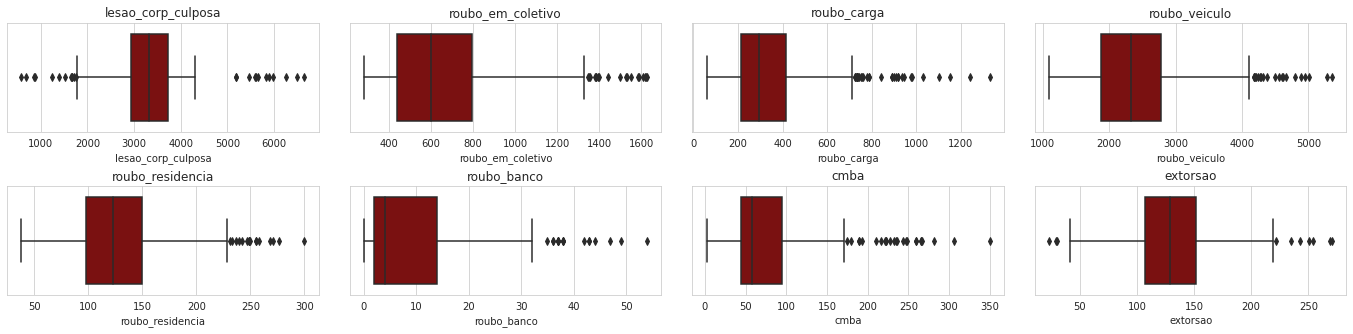

In [ ]:
#@title   Fazendo os boxplot
test_outliers = df[[ 'lesao_corp_culposa', 'roubo_em_coletivo', 'roubo_carga',
                     'roubo_veiculo', 'roubo_residencia','roubo_banco','cmba','extorsao']].copy()
                                   
colum = 4
fig = plt.figure(figsize=(24,5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.5)
rows = math.ceil(float(test_outliers.shape[1]) / colum)
for i, colunas in enumerate(test_outliers.columns):
    ax = fig.add_subplot(rows, colum, i + 1)
    ax.set_title(colunas)
    sns.boxplot(test_outliers[colunas], color ='darkred');


Embora existam a presença dos outliers presimos verificar qual a real interferencia na distribuição e até mesmo se estes causariam alguma interferência.

* **A forma que os dados foram coletados**
> Os dados foram coletados por meio da contagem de cada ocorrência contabilizada no banco de dados. Dessa forma, eles no passam uma informação muito relevante: Os dados embora numericos eles são **robusto à outliers**, neste caso específico, pois existe um controle no banco de dados onde há um filtragem de cada caso.

Dessa maneira, não precisamos verificar para os dados sem falores faltantes.


---
# **Análise de similaridade**

Para identificar associações entre as ocorrências foi gerado um mapa de calor com o **indices de correlação.**


## **Análise de correlação**
Para gerar qualquer relação entre os dados primeiramente precisamos analisar o **coeficiente de correlação**. Este é um bom indicador de associação entre 2 variáveis, ou seja, se estas conteplam informações em conjunto.

Para isso utilizaremo um mapa de calor que irá relacionar uma matriz de correlação que avalia a relação de todas as variáveis entre si. Na diagonal principal o valor é máximo pois é a relação própia feature com ela mesma. Para avaliar os valores seguimos as seguintes regras, onde $r$ é o coeficiente de correlação:

1. Valores de $r$ ficam entre $-1 < r < 1$;
2. $r$ nos extremos significam correlação perfeita e mudando apenas o sentido;
3. Tecnicas de escalonamento não altera os valores de $r$;
4. Não fucionam para casos não lineares;


In [ ]:
# plotar um heatmap a partir das correlações
coor = df.drop(colums=['ano','mes']).coor()
plt.figure(figsize=(8,6))
sns.heatmap(corr, fmt='.2f', cmap='viridis', square=True, linecolor='white', annot=True);

O código acima representa a forma que foi gerado o mapa de calor, mas com o número de variáveis fica um pouco dificil a visualização. Para visualizar melhor acesse ao [Link](https://raw.githubusercontent.com/Tiao553/Projects_Data_Science/main/img/heeatmap_completo_Violence_rio.png).

> **Por meio deste mapa é possível visualizar quais features tem associação entre si e dessa forma estabelecer similaridade entre elas.**

Esta etapa facilita a gerar insights pois elas podem indicar o caminho para a sua análise. **Sendo assim vamos para esta análise.**

Considerando que a 3 tipos de crimes alocados neste conjunto de dados:

* **Crimes contra patrimônios**
* **Crimes contra vida**
* **Tráfico de drogas**

Além disso foi possivel verificar uma associação entre :

>>* **Crimes contra vida e roubos**.

Dessa maneira vamos fazer uma análise isolada em cada uma dessas características em seguida vemos como esta se relacionam.

---


---

## **Análise dos crimes  de Roubo**

In [ ]:
#   Criando um dataframe que corresponde à apenas roubo
df_roubos = df[['ano', 'mes','roubo_transeunte', 'roubo_celular', 
               'roubo_em_coletivo', 'roubo_rua','roubo_veiculo', 
               'roubo_carga', 'roubo_comercio', 'roubo_residencia',
               'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
               'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 
               'total_roubos','apf','aaapai']].copy()

Separamos os dados alocando todos referente aos roubos e para observamos a distribuição destes alocamos tambem variáveis de tempo.

Dessa forma serão feitas as seguintes análises:
>>> * **Relação de valores anuais e totais de roubos**.

>> * **Relação da classificação dos roubos em relação aos meses**.

>  Por fim, avaliar gerar conclusões parciais

Abaixo se encontra um gráfico de barras onde relacionamos a média em cada ano de todos os roubos:

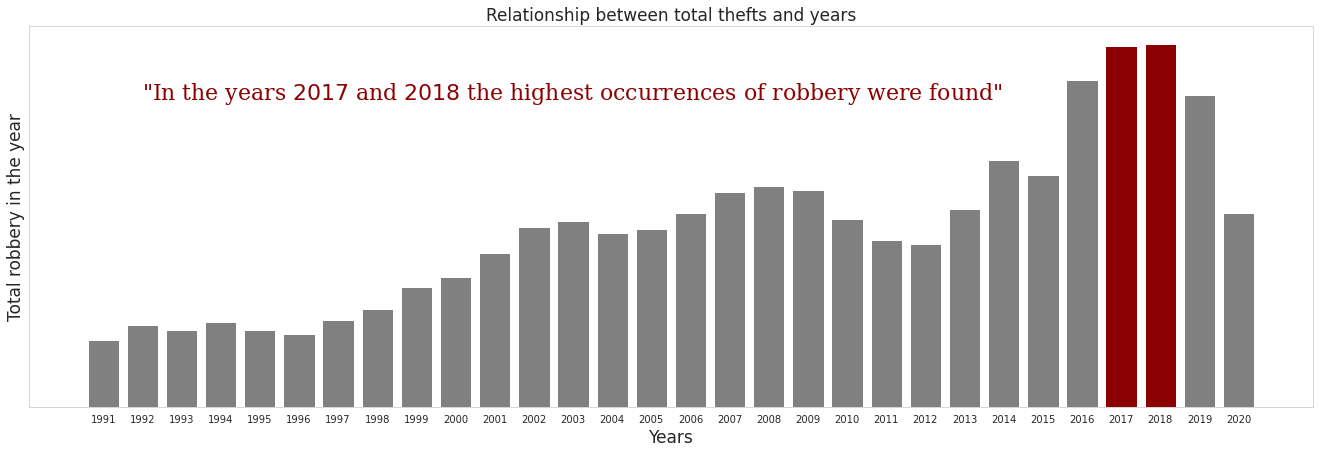

In [ ]:
#@title
aux = df_roubos.drop(columns=['mes','apf','aaapai']).groupby(['ano']).total_roubos.mean().drop(index = 2021)
font = {'weight': 'normal','size': 17,}
font2 = {'family': 'serif', 'color':'darkred','weight': 'normal','size': 22,}
colori = []
for i in aux.values:
    if i >= (aux.values.max())*0.95 :
        colori.append('darkred')
    else:
        colori.append('grey')
plt.figure(figsize=(23,7))
plt.bar(aux.index,aux.values,color=colori);
plt.yticks([])
plt.xticks(aux.index)
plt.xlabel('Years', fontdict=font)
plt.ylabel('Total robbery in the year', fontdict=font,)
plt.grid(False)
plt.text(1992,((aux.values.max())*0.85) ,
         r'"In the years $2017$ and $2018$ the highest occurrences of robbery were found"',
         fontdict=font2)
plt.title('Relationship between total thefts and years', fontdict=font)
plt.show()


> Primeiramente vale relembrarmos do contexto do estado do Rio de janeiro, onde desde a década de $1980$ até os anos de $2008$ figurava entre os estados mais violentos.

* Os dados mostram que os roubos até os anos de 2008 seguem uma tendência de crescimento.
* Como em 2008 foram adotadas medidas públicas para controle é notório o decaimento dos roubos.
* Em $2017$ e $2018$ pode-se observar que o estado obteve o maiores números de ocorrências, **chegando em $2018$ ao número médio anual de $19301$ ocorrências.**

>> ### **Com os anos de 2017 e 2018 sendo os com mais roubos registrados, como é a distribuição dos roubos médios a cada mês?**

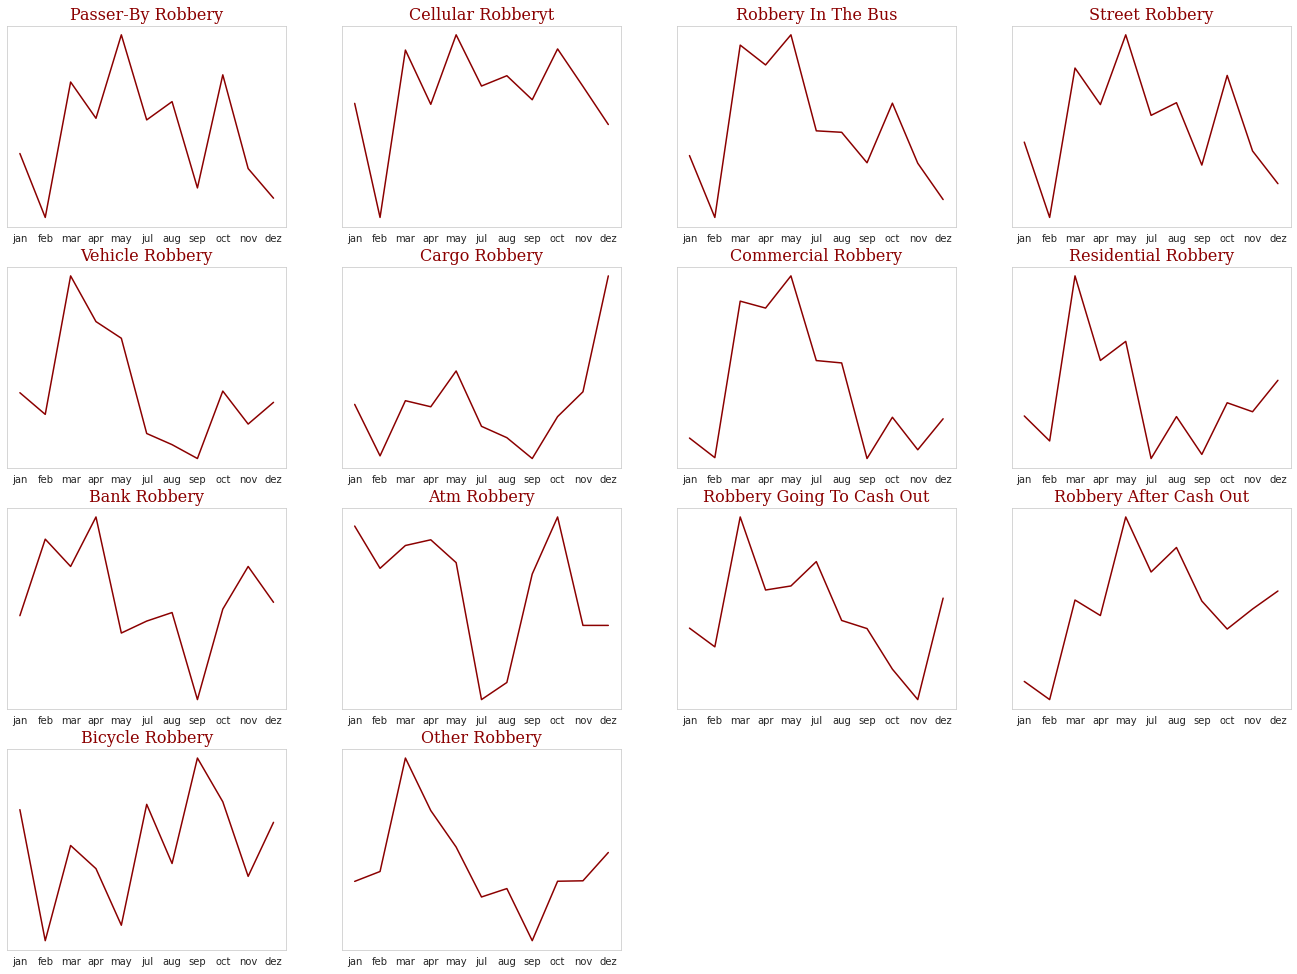

In [ ]:
#@title
aux3 = df_roubos.set_index(['mes']).mean(level=0).drop(columns=['ano','total_roubos','apf','aaapai'])
title =['passer-by robbery', 'cellular robberyt', 
        'robbery in the bus', 'street robbery', 'vehicle robbery', 
        'cargo robbery', 'commercial robbery', 'residential robbery',
        'bank robbery', 'ATM robbery', 'robbery going to cash out',
        'robbery after cash out', 'bicycle robbery', 'other robbery']
fonter = {'family': 'serif', 'color':'darkred','weight': 'normal','size': 16,}
colum = 4
fig = plt.figure(figsize=(23,17))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
rows = math.ceil(float(aux3.shape[1]) / colum)
for i, colunas in enumerate(aux3.columns):
    ax = fig.add_subplot(rows, colum, i + 1)
    plt.title(title[i].title(),fontdict=fonter)
    plt.plot(aux3.index,aux3[colunas], color='darkred');
    plt.grid(False)
    plt.yticks([])
    plt.xticks()

* Exceto o `roubo de bancos`  não apresentam queda no mês de fevereiro presedido de um aumento em março. 
> Neste periodo, grande parte do Brasil, principalmente no Rio de Janeiro acontece o Carnaval. Podemos verificar que com um grande evento social de grande magnitude influência e muito no aumento das ocorrência de roubos.

**Para confirmar a nossa análise vamos verificar a média dos valores de ocorrência,  logo:**

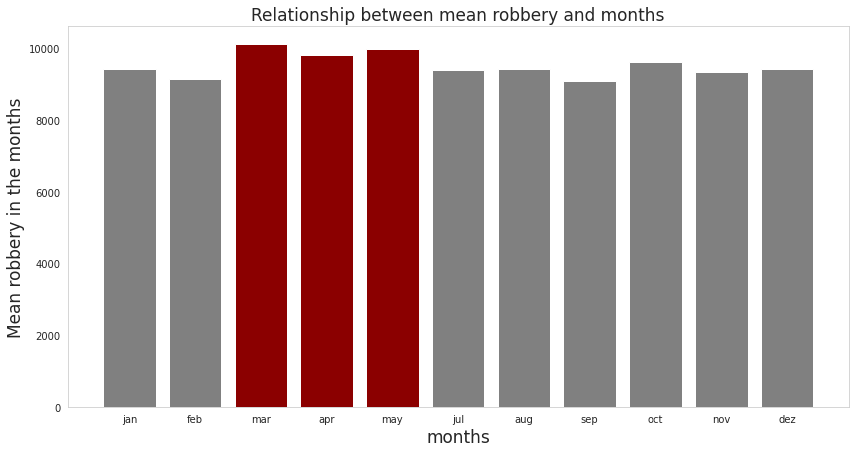

In [ ]:
#@title
sum_mes = df_roubos.drop(columns=['ano','apf','aaapai']).set_index(['mes']).total_roubos.mean(level=0)
colorbar = []
for i in sum_mes:
    if i >= 9824.92 :
        colorbar.append('darkred')
    else:
        colorbar.append('grey')
plt.figure(figsize=(14,7))
plt.bar(sum_mes.index,sum_mes.values,color=colorbar);
#plt.yticks([9000,9200,9400,9600,9800,10000,10200])
#plt.ylim(8990,10200)
plt.xticks()
plt.xlabel('months', fontdict=font)
plt.ylabel('Mean robbery in the months', fontdict=font,)
plt.grid(False)
plt.title('Relationship between mean robbery and months', fontdict=font)
plt.show()

* Como consequência do aumento provido do **carnaval** a tendência dos roubos **continuam até o mês de maio**. Podendo ser visualizado como as maiores ocorrência de registro.

* As ocorrência decaem muito apos este fato atingindo o seu menor número de ocorrência em **novembro**.

>> **Obtidos conhecimentos sobre como estão distribuidos os roubos podemos avaliar os crimes contra a vida.**

---


---

### Por fim precisamos avaliar as princiapais ocorrência de Roubos.

Como há valores faltantes para obtermos uma melhor métrica deste dados, vamos avaliar a porcentagem dos tipos de roubos dado a porcentagem de totais de roubos:

In [ ]:
((df_roubos.drop(columns=['ano', 'mes','total_roubos']).mean()/df.total_roubos.mean())*100).sort_values(ascending = False)

 |Tipo de Roubo|Porcentagem do total contabilidado|
|:----------------------:|:-----------:|
| Roubo de rua            | 50.70 %|
| Roubo de transeunte     | 36.34 %|
| Roubo de veiculo        | 25.66 % |
| Outros de roubos        | 12.84 % |
| Roubo de celular        | 10.47 % |
| Roubo em coletivo    | 7.02 % |
| Roubo comercio       | 4.71 %|
| Roubo carga          | 3.63 % |
| Roubo apos_saque     | 1.47 % | 
| Roubo residencia     | 1.36 % |
| Roubo de bicicleta      | 0.13 % | 
| Roubo conducao_saque | 0.11 % |  
| Roubo banco          | 0.09 % | 
| Roubo de caixa eletronico  | 0.04 %  |   
|Total de roubos | 9518,28| 

---


---

### **Relação entre roubos  e prisões em flagrante e a menores**

Uma relação importante também a ser analisada é como se relacionam as prisões em flagrante ou com ato infracionários de menores como roubos.

> Para isso vamos analisar o que o indicador de correção nos informa em relação aos roubos: 

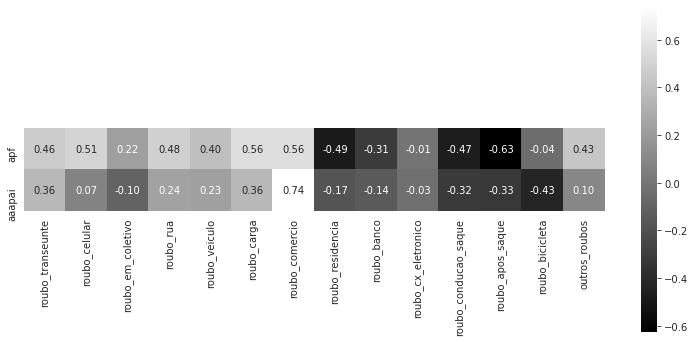

In [ ]:
#@title
plt.figure(figsize = (13,6) )
sns.heatmap(df_roubos.drop(columns=['ano']).corr().iloc[-2:,:-3], fmt='.2f', cmap='gist_gray', square=True, linecolor='white', annot=True);

> Podemos verificar que **o `roubo de comércio` tem associação consideravel com apreenção de menores.**

> Para prisão em flagrante podemos verificar que há **associação entre `roubo após saque`, `roubo de carga` e `roubo de comercio`.** Embora esse número seja baixo podemos verificar como ele se comporta em uma relação temporal entre eles.

Dessa maneira poderemos verificar visualmente se há associação.

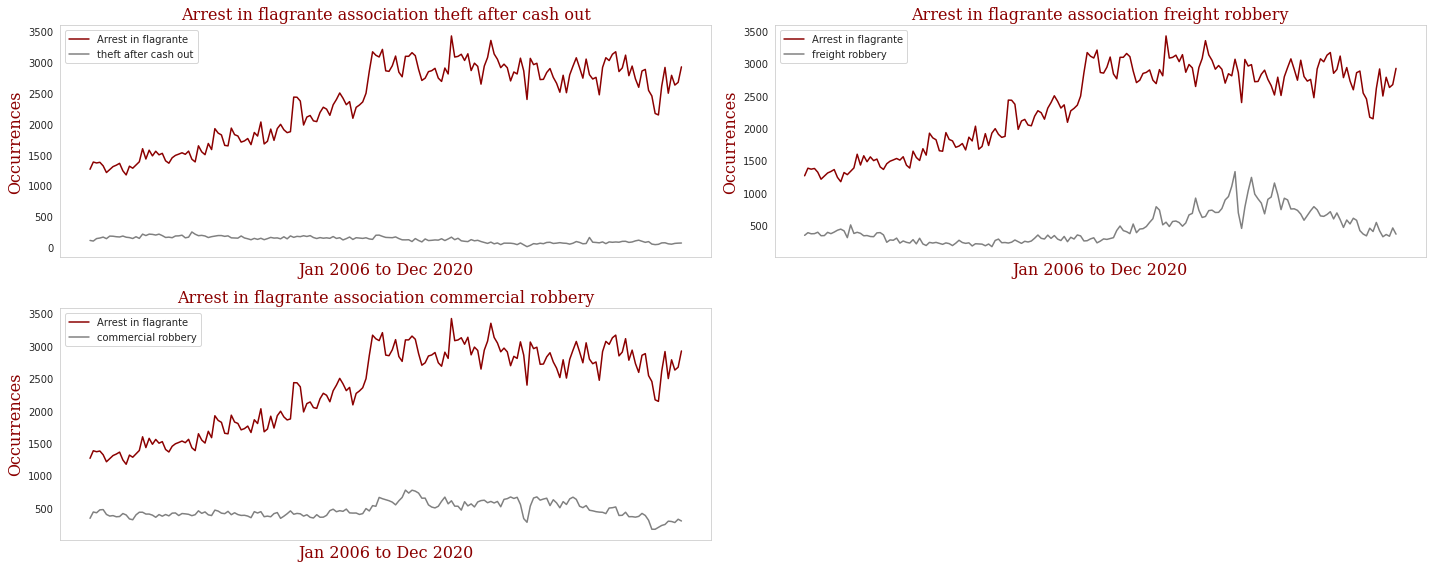

In [ ]:
#@title
rela = df_roubos[df_roubos.ano >= 2006]
rela = rela[['apf','roubo_apos_saque','roubo_carga','roubo_comercio']].copy()
labeli = ['Arrest in flagrante', 'theft after cash out', 'freight robbery', 'commercial robbery']
colum = 2
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
rows = math.ceil(float(rela.shape[1]) / colum)
for i, colunas in enumerate(rela.columns):
    if i>0:
        ax = fig.add_subplot(rows, colum, i);
        plt.plot(rela.index,rela['apf'], color='darkred', label = 'Arrest in flagrante');
        plt.plot(rela.index,rela[colunas], color = 'grey', label = labeli[i]);
        plt.title((labeli[0]+' association ' + labeli[i]),fontdict=fonter)
        plt.xlabel('Jan 2006 to Dec 2020',fontdict=fonter)
        plt.ylabel('Occurrences',fontdict=fonter)
        plt.legend()
        plt.grid(False)
        plt.xticks([])

plt.tight_layout() 

Analisando a correlação e abordagem visual, não podemos assumir que existam alguma relação direta entre aprenção em flagrante e os roubos de comercio, carga e de comercio.

**No entanto, existem alguns pontos onde é observado a associação entre apreenção em flagrante e roubos de carga, assim com os de comércio. Portanto podemos dizer que os dois participam da distribuição de prisões em flagrante embora a associação seja fraca.**

>> Para a apreenção de menores vamos adotar também a ferramenta de visualização temporal dos casos a fim de analisar a distribuição da `AAAPAI` e `Roubos de comércio`.

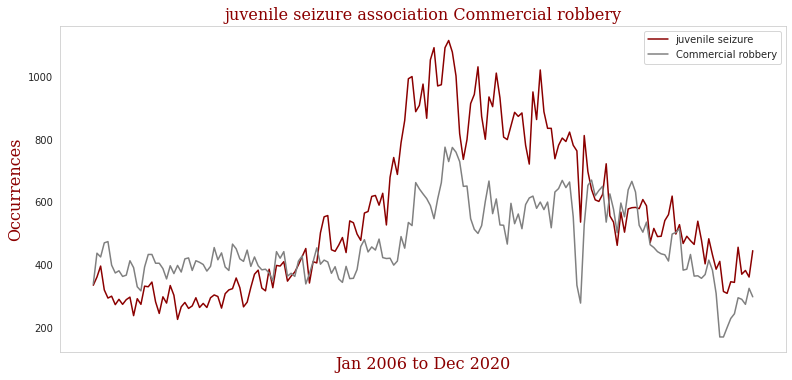

In [ ]:
#@title
aux = df_roubos[df_roubos.ano > 2005]
plt.figure(figsize=(13,6));
plt.plot(aux.index,aux['aaapai'], color='darkred', label = 'juvenile seizure');
plt.plot(aux.index,aux['roubo_comercio'], color = 'grey', label = 'Commercial robbery');
plt.title(('juvenile seizure association Commercial robbery'),fontdict=fonter);
plt.xlabel('Jan 2006 to Dec 2020',fontdict=fonter);
plt.ylabel('Occurrences',fontdict=fonter);
plt.legend();
plt.grid(False);
plt.xticks([]);

>**Com respaldo do indice de correlação e por meio da análise visual, podemos dizer que os roubos comerciais tem relação com realização da prática do ato infracional.**

---


---

>>> ## Podemos concluir sobre os roubos que:

* cerca de $87,04$% dos roubos são considerados "roubos diários", ou seja acontecem rotineiramente. Esses roubos são os `roubos de rua` e os `roubos de transeunte`  que é um crime comum e corriqueiro caracterizado por assalto a indivíduos que são abordados enquanto transitam em vias públicas com subtração de pertences de forma violenta.

* No período do Carnaval os roubos aumentam.
* Em  $2017$  e  $2018$  pode-se observar que o estado obteve o maiores números de ocorrências, chegando em  $2018$  ao número médio anual de  $19301$  ocorrências.
* Os roubos comerciais tem relação com apreenção de menores.

---


---

## **Análise dos crimes contra a vida**

In [ ]:
#   Avaliando crimes contra a vida
df_ccv = df[['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada','apf','aaapai']].copy()

> Separamos as colunas referentes a crimes contra vida no novo dataframe acima. Para conseguirmos ter uma noção da distribuição dos crimes vamos fazer uma plotagem que vai referenciar a média das ocorrências dado cada mês.

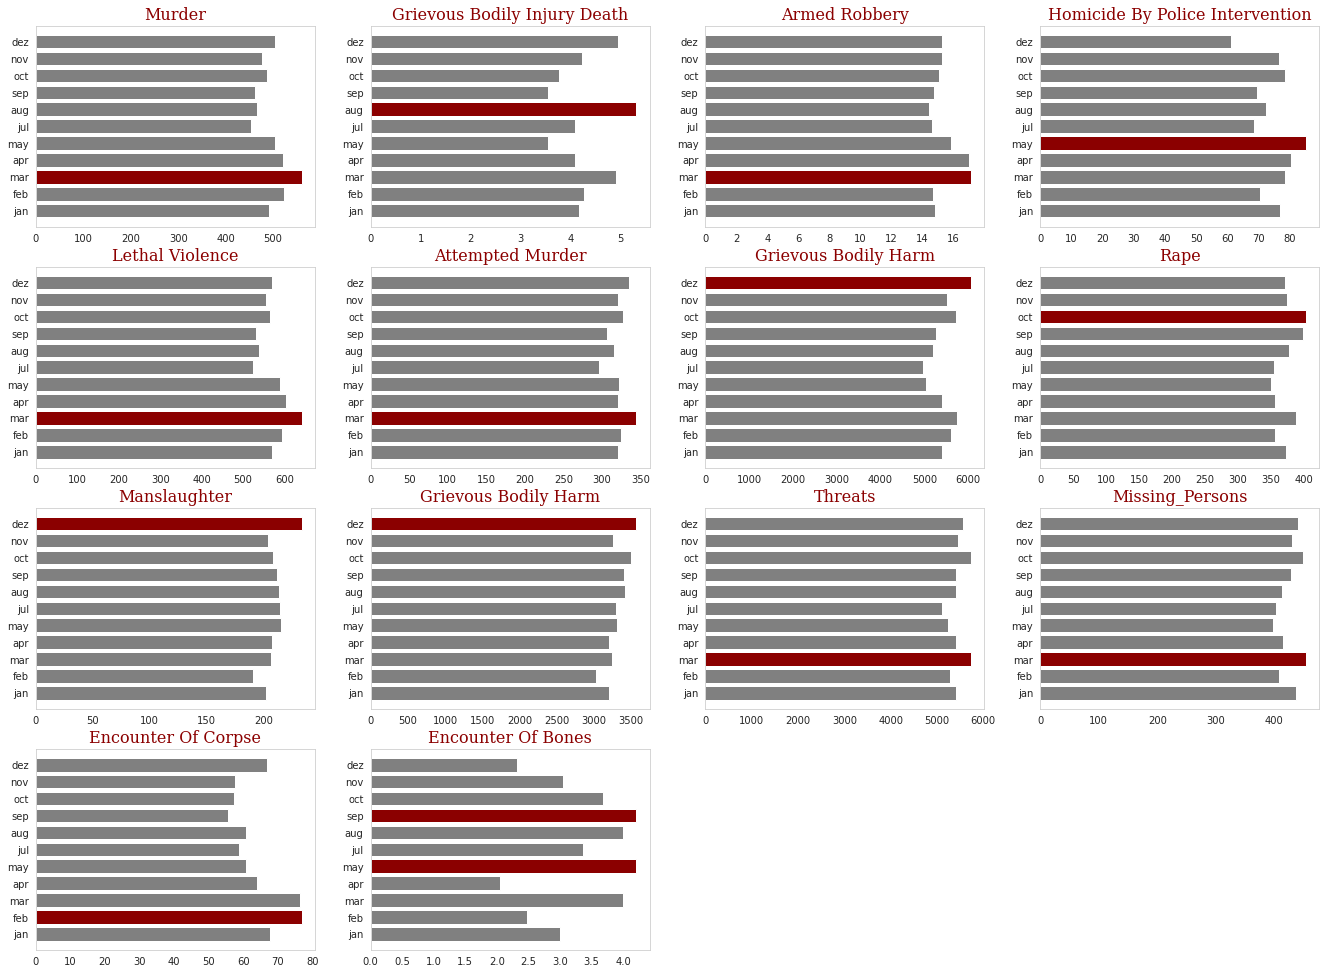

In [ ]:
#@title
mes_ccv = df_ccv.set_index(['mes']).mean(level=0).drop(columns=['ano','apf','aaapai'])
fonter = {'family': 'serif', 'color':'darkred','weight': 'normal','size': 16,}
title = ['murder', 'grievous bodily injury death', 'armed robbery',
         'homicide by police intervention', 'lethal violence',
         'attempted murder', 'grievous bodily harm', 'rape', 'manslaughter', 
         'grievous bodily harm', 'threats', 'missing_persons',
         'encounter of corpse', 'encounter of bones','military police officers killed on duty', 
         'civilian police officers killed on duty']
colum = 4
fig = plt.figure(figsize=(23,17))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
rows = math.ceil(float(mes_ccv.shape[1]) / colum)
for i, colunas in enumerate(mes_ccv.columns):
    ax = fig.add_subplot(rows, colum, i + 1)
    max = []
    for j in mes_ccv[colunas]:
        if j == mes_ccv[colunas].max() :
             max.append('darkred')
        else:
             max.append('grey')
    plt.title(title[i].title(),fontdict=fonter)
    plt.barh(mes_ccv.index,mes_ccv[colunas], color=max);
    plt.grid(False)
    #plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

>### Podemos verificar que, em média, o mês de março acontece a maioria dos crimes contra a vida.

### Embora a distribuição **apresenta um desvio padrão médio pequeno** na maioria das ocorrências dado o mês, gostariamos de saber se há alguma associação entre os crimes.

 Para isso vamos utilizar do recurso do mapa de calor em conjunto ao índice de correlação:


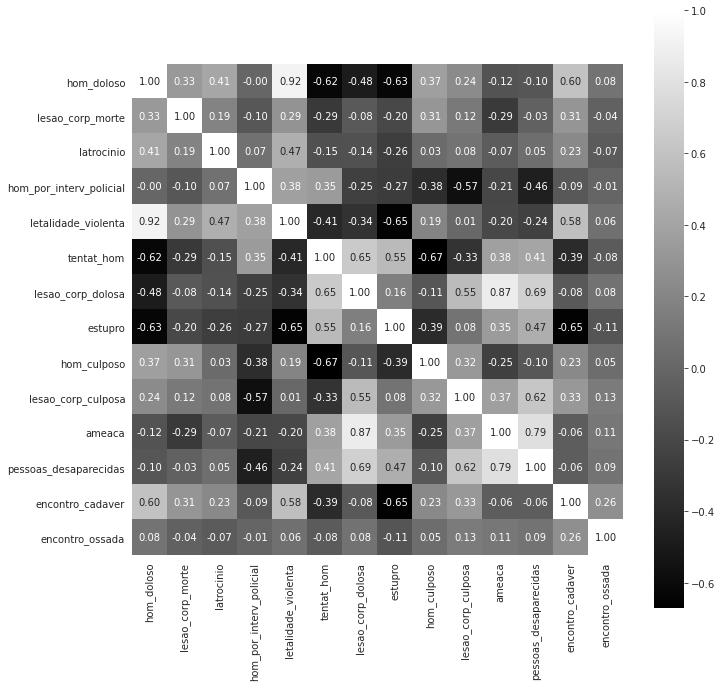

In [ ]:
HM_ccv = df_ccv.drop(columns=['ano','apf','aaapai']).corr()
plt.figure(figsize=(11,11))
sns.heatmap(HM_ccv, fmt='.2f', cmap='gist_gray', square=True, linecolor='white', annot=True);

Avaliando o mapa de calor podemos visualizar relação forte entre as seguintes ocorrências:
> * `hom doloso` e `letalidade violenta`;

> * `lesao coporal dolosa` e `ameaca`;

> * `lesao coporal culposa`, `ameaca` e `pessoas desaparecidas`

> * `estupro`,`tentativa homicidio`,`pessoas desaparecidas` e `letalidade violenta`;

> * `encontro cadaver`, `letalidade violenta`, `homicidio doloso` e `estupro`;





---


---

### Homicidio doloso: Quando há intenção de matar outro indivíduo.

Em muitos destes casos a violência implicita neste crime é muito alta.

## **Será que os dados de violência de letalidade segue os dados da ocorrência de homício doloso?**

> Para verificar este fato vamos observar por meio da evolução dos dados no periodo de amostragem de forma que possamos verificar a distribuição destes.

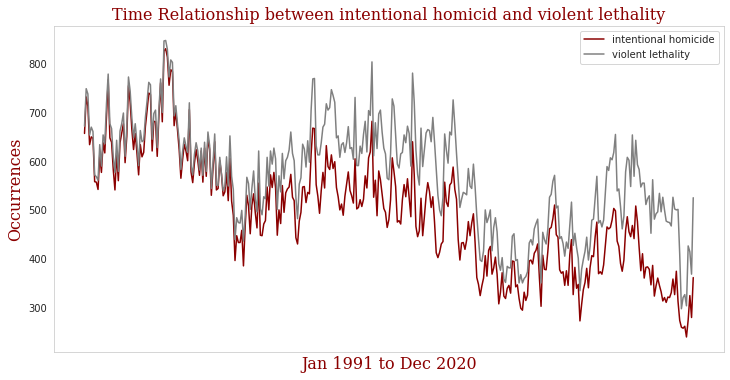

In [ ]:
#@title
ava1 = df_ccv[['hom_doloso','letalidade_violenta']].copy()
fig = plt.figure(figsize=(12,6))
labeli = ['intentional homicide', 'violent lethality']
colori = ['darkred','grey']
for i, colunas in enumerate(ava1.columns):
    color = colori[i]
    plt.plot(ava1.index,ava1[colunas], color, label = labeli[i]);
    plt.title('Time Relationship between intentional homicid and violent lethality',fontdict=fonter)
    plt.xlabel('Jan 1991 to Dec 2020',fontdict=fonter)
    plt.ylabel('Occurrences',fontdict=fonter)
    plt.legend()
    plt.grid(False)
    plt.xticks([])

>>Podemos verificar que mesmo com magnitudes diferentes os dados seguem quase a mesma dinâmica. **Dessa maneira podemos confirmar que homicídios dolosos tendem a ter alta associação com violeência de letalidade.**

---


---

### **Ameaça: fato, ação, gesto ou palavra que intimida ou atemoriza.**

Ameaça em muitos os casos podem ser fundamentadas ou não, ou mesmo ter ações relacionadas ou não. 

## Neste tópico vamos avaliar se um ocorrência de ameaça resultou ou seguiram tendências de outras ocorrências.

> Quando uma ocorencia de ameaça é registra um primeiro fato que pensa é medo de alguma lesão ou ate mesmo à morte. Para isso é feita a ocorrência como medida de conteção de ações assim.

Para avaliarmos este viés, vamos avaliar temporalmente a realação entre `Lesão corporal Dolosa` e `ameaca`:

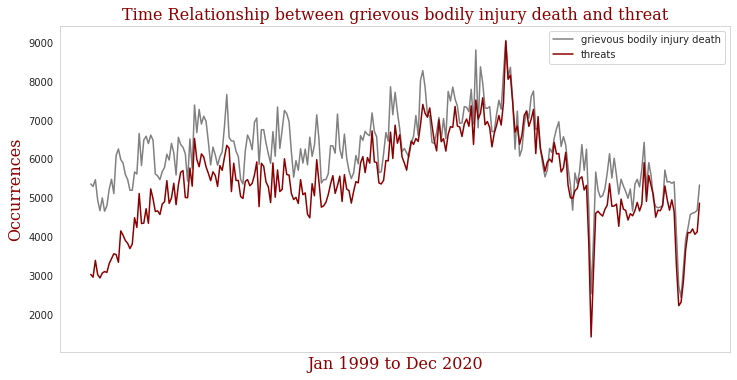

In [ ]:
#@title
ava = df_ccv[df.ano>= 1999].copy()
ava = ava[['lesao_corp_dolosa', 'ameaca']].copy()
fig = plt.figure(figsize=(12,6))
labeli =['grievous bodily injury death', 'threats']
for i, colunas in enumerate(ava.columns):
    if colunas == 'ameaca':
        color = 'darkred'
    elif colunas == 'lesao_corp_dolosa':
        color = 'grey'
    plt.plot(ava.index,ava[colunas], color, label = labeli[i]);
    plt.title('Time Relationship between grievous bodily injury death and threat',fontdict=fonter)
    plt.xlabel('Jan 1999 to Dec 2020',fontdict=fonter)
    plt.ylabel('Occurrences',fontdict=fonter)
    plt.legend()
    plt.grid(False)
    plt.xticks([])

Podemos verificar que distribuição das **duas ocorrência seguem um padrão similar e as duas podem ser associadas.**

> No entanto a dinâmica de ameaça **não segue relativamente a dinâmica em relação à Lesão corporal Dolosa.** Dessa maneira, esta deve sofrer interferência de outras ocorrências em conjunto.

Se analisarmos os indices de correlação, ótimos indicadores de associação, podes verificar que a ocorrência de `ameacas` está relacionada com `Homicídio culposo` e `pessoas desaparecidas`.

Para avaliarmos essa associação vamos utilizar a ferramenta de distribuição temporal:

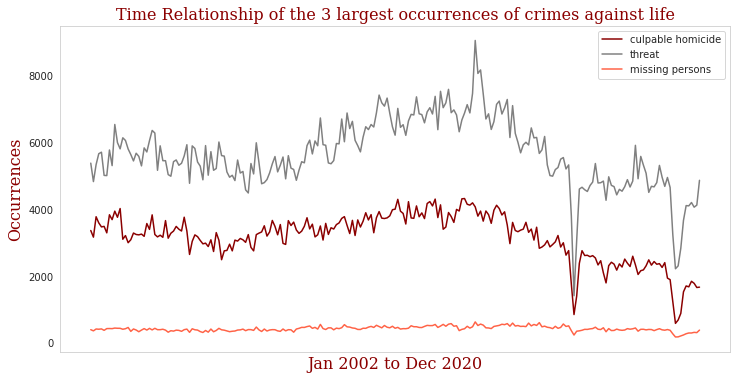

In [ ]:
#@title
ava2 = df_ccv[df_ccv.ano >= 2002]
ava2 = ava2[['lesao_corp_culposa', 'ameaca','pessoas_desaparecidas']].copy()
fig = plt.figure(figsize=(12,6))
labeli = ['culpable homicide', 'threat', 'missing persons']
colori = ['darkred','grey','tomato']
for i, colunas in enumerate(ava2.columns):
    color = colori[i]
    plt.plot(ava2.index,ava2[colunas], color, label = labeli[i]);
    plt.title('Time Relationship of the 3 largest occurrences of crimes against life',fontdict=fonter)
    plt.xlabel('Jan 2002 to Dec 2020',fontdict=fonter)
    plt.ylabel('Occurrences',fontdict=fonter)
    plt.legend()
    plt.grid(False)
    plt.xticks([])

Com base no gráfico, podemos verificar que as ocorrências de homicídio culposo e pessoas desaparecidas seguem boa parte da tendência da distribuição de `ameacas`.


>> Dessa forma podemos concluir que os crime de `Lesão corporal Dolosa`, `Homicidio culposo` e `Pessoas desapárecidas` tem **interação direta com os crime de `ameaca`,** como tambem entre si.

---


---

### **Estupro: crime que consiste em ter relações sexuais ou praticar ato libidinoso sem consentimento.**

Existem muitas formulações e até mesmo exemplos que interligam o estupro com outros crimes. Pessando nisso, vamos avaliar neste estágio se outras ocorrêcias possuem associação com estupro.

> Neste tópico, baseados no indice de correlação calculado acima. Com base nos com com relativos valores.

Para isso vamos avaliar em primeiro momento, por meio de avaliação temporal  como se relacionam as ocorrências de `Tentativa de homícidio`, `pessoas desaparecidas` e `letalidade violenta` com o `estupro`.

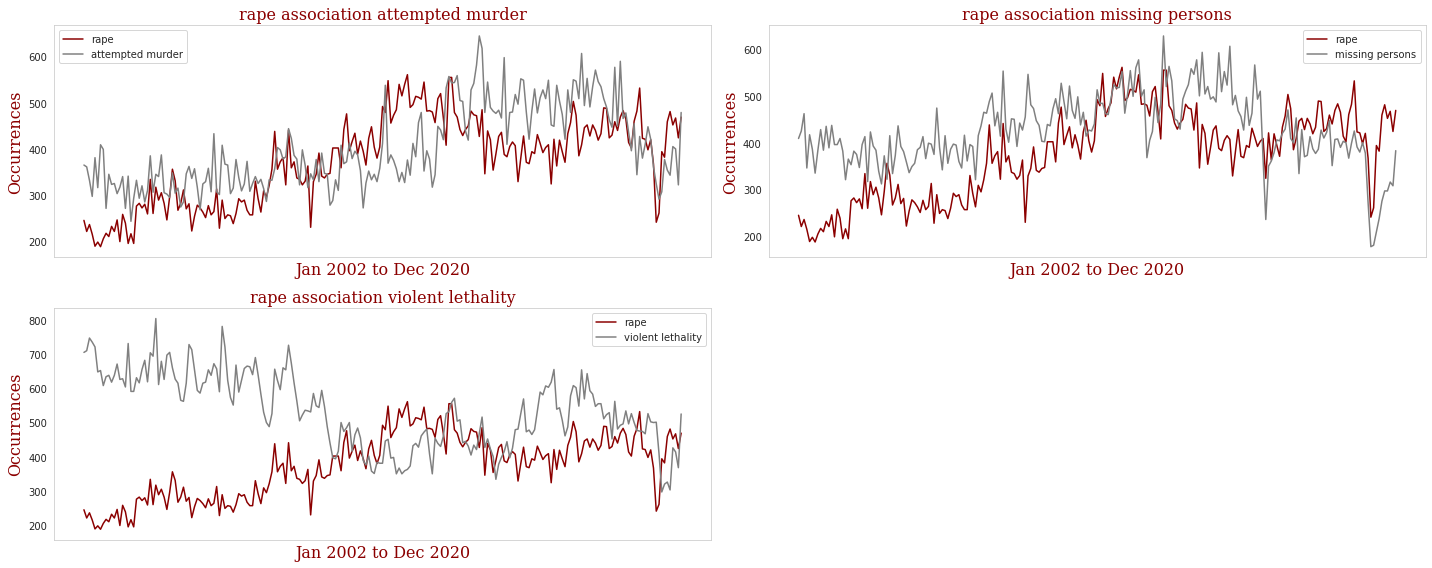

In [ ]:
#@title
ava3 = df_ccv[df_ccv.ano >= 2003]
ava3 = ava3[['estupro','tentat_hom','pessoas_desaparecidas', 'letalidade_violenta']].copy()
labeli = ['rape', 'attempted murder', 'missing persons', 'violent lethality']
colum = 2
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
rows = math.ceil(float(ava3.shape[1]-1) / colum)
for i, colunas in enumerate(ava3.columns):
    if i>0:
        ax = fig.add_subplot(rows, colum, i);
        plt.plot(ava3.index,ava3['estupro'], color='darkred', label = 'rape');
        plt.plot(ava3.index,ava3[colunas], color = 'grey', label = labeli[i]);
        plt.title((labeli[0]+' association ' + labeli[i]),fontdict=fonter)
        plt.xlabel('Jan 2002 to Dec 2020',fontdict=fonter)
        plt.ylabel('Occurrences',fontdict=fonter)
        plt.legend()
        plt.grid(False)
        plt.xticks([])
plt.tight_layout() 

Podemos verificar que, embora as magnitudes sejam diferentes, a `Tentativa de homicídio` e `Pessoas desaparecidas` apresentam dinâmica similar. Isto pode ser visto visualmente, por meio do gráfico.

> Para verificação visual é necessário avaliar pontos os pontos de crescimento ou de queda nos valores das ocorrências. Em seguida avaliar se a outra classificação segue a mesma tendência. 

Avaliando visualmente você poderia ficar em duvida se `letalidade violenta` há alguma associação com os **estupros**.

Para isso vamos ao indice de correlação.


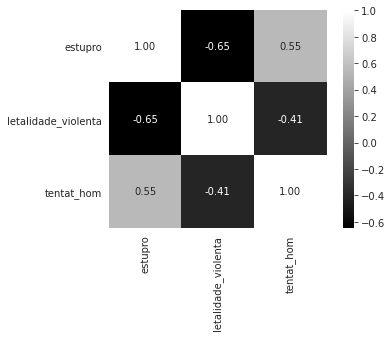

In [ ]:
#@title
x = df_ccv[['estupro','letalidade_violenta','tentat_hom']].corr()
sns.heatmap(x, fmt='.2f', cmap='gist_gray', square=True, linecolor='white', annot=True);

> O indice de correlação, nos mostra que a `letalidade_violenta` possui maior associação com o estupro. Vale ressaltar que estão longe de ser uma correlação perfeita, mas existe a correlação entre elas.


---


---

### Muitas vezes, quando noticiados, possuem a triste noticia de serem **relacionadas com a morte.**

**Neste caso, o criminoso tem a inteção de matar o que qualifica o caso como homicídio doloso. Além disso, muitas vezes so resta encontrar o corpo.**

>>Dessa forma, vamos avaliar como os dados nos dão aporte para provar esta relação. Para isso vamos **utilizar do recurso temporal para avaliar** a relação entre o estupro e estas duas condições.

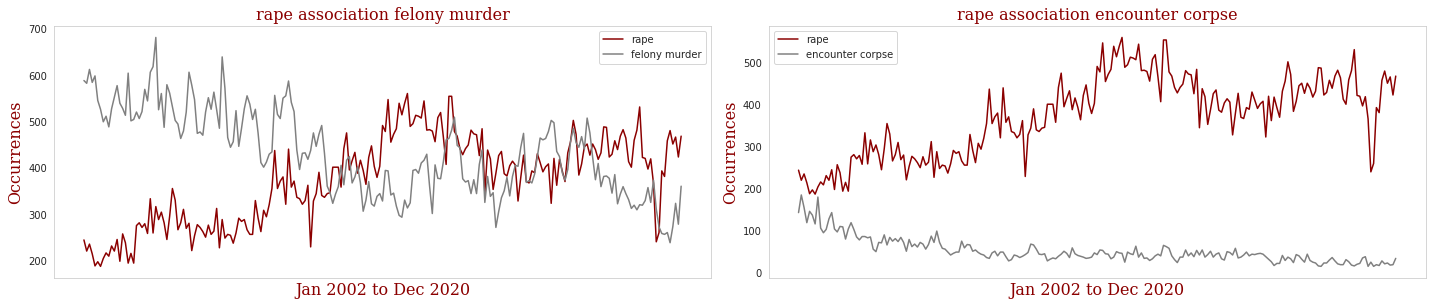

In [ ]:
#@title
ava4 = df_ccv[df_ccv.ano >= 2003]
ava4 = ava4[['estupro','hom_doloso','encontro_cadaver']].copy()
labeli = ['rape', 'felony murder', 'encounter corpse']
colum = 2
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
rows = math.ceil(float(ava4.shape[1]) / colum)
for i, colunas in enumerate(ava4.columns):
    if i>0:
        ax = fig.add_subplot(rows, colum, i);
        plt.plot(ava4.index,ava4['estupro'], color='darkred', label = 'rape');
        plt.plot(ava4.index,ava4[colunas], color = 'grey', label = labeli[i]);
        plt.title((labeli[0]+' association ' + labeli[i]),fontdict=fonter)
        plt.xlabel('Jan 2002 to Dec 2020',fontdict=fonter)
        plt.ylabel('Occurrences',fontdict=fonter)
        plt.legend()
        plt.grid(False)
        plt.xticks([])

plt.tight_layout() 

> Novamente a análise visual não nos fornece aporte para decretar diretamente uma relação entre o estupro com `Homicídio doloso` e o `encontro de corpos`. Para realmente termos um indicador dessa associação devemos recorrer a correlação, logo:

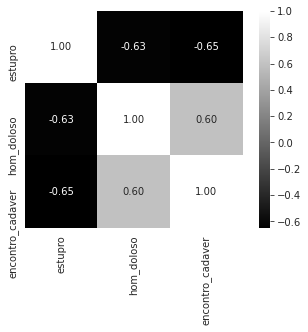

In [ ]:
#@title
y = df_ccv[['estupro','hom_doloso','encontro_cadaver']].corr()
sns.heatmap(y, fmt='.2f', cmap='gist_gray', square=True, linecolor='white', annot=True);

> Por meio do indice de correlação podemos comprovar que o **estupro tem associação relativa**  com `Homicídio doloso` e `Encontro de corpos`.


Dessa maneira podemos dize que as ocorrências de **estupro** pode ser composta e associadas entre os crimes apresentados.

No entanto, diferente das ameaças, não podemos afirmar que as todas as ocorrência associadas ao **estupro** possuem associação entre si.


---


---

### **Relação entre crimes contra a vida e prisões em flagrante e a menores**

Uma forma interessante de analisar os crimes contra vida é relacionar os crimes com as prissões em flagrante, que pode mostrar que **impunidade neste caso não uma opção** e outro lado triste é relação a apreenção de menores que podem ter **acabado com futuro por uma decisão errada.**

>  Primeiramente vamos avaliar o indice de correlação entre as duas situações e os crimes contra a vida.

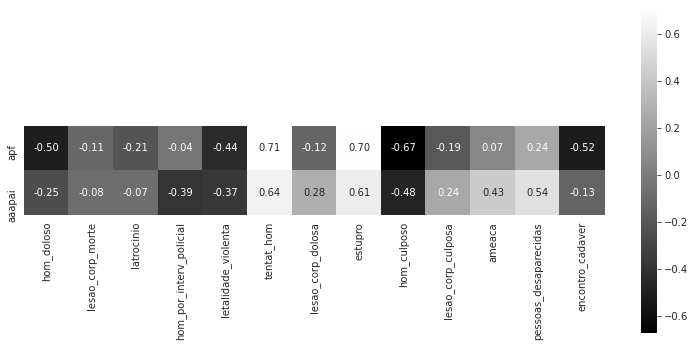

In [ ]:
#@title
plt.figure(figsize = (13,6) )
sns.heatmap(df_ccv.drop(columns=['ano','mes']).corr().iloc[-2:,:-3], fmt='.2f', cmap='gist_gray', square=True, linecolor='white', annot=True);

* Quando avaliamos as apreenções em flagrante podemos verificar que podem haver associação entre:
> `tentativa de homicídio`, `estupro` e `Homicídio culposo` .

* Avaliando as apreensões de Adolescentes associando aos crimes contra vida podemos associar entre:
> `tentativa de homicídio` e `estupro`.

**Para isso vamos usar do recurso temporal onde iremos avaliar a distribuição das ocorrências citadas. Para isso vamos avaliar as apreenções em flagrante primeiramente:**

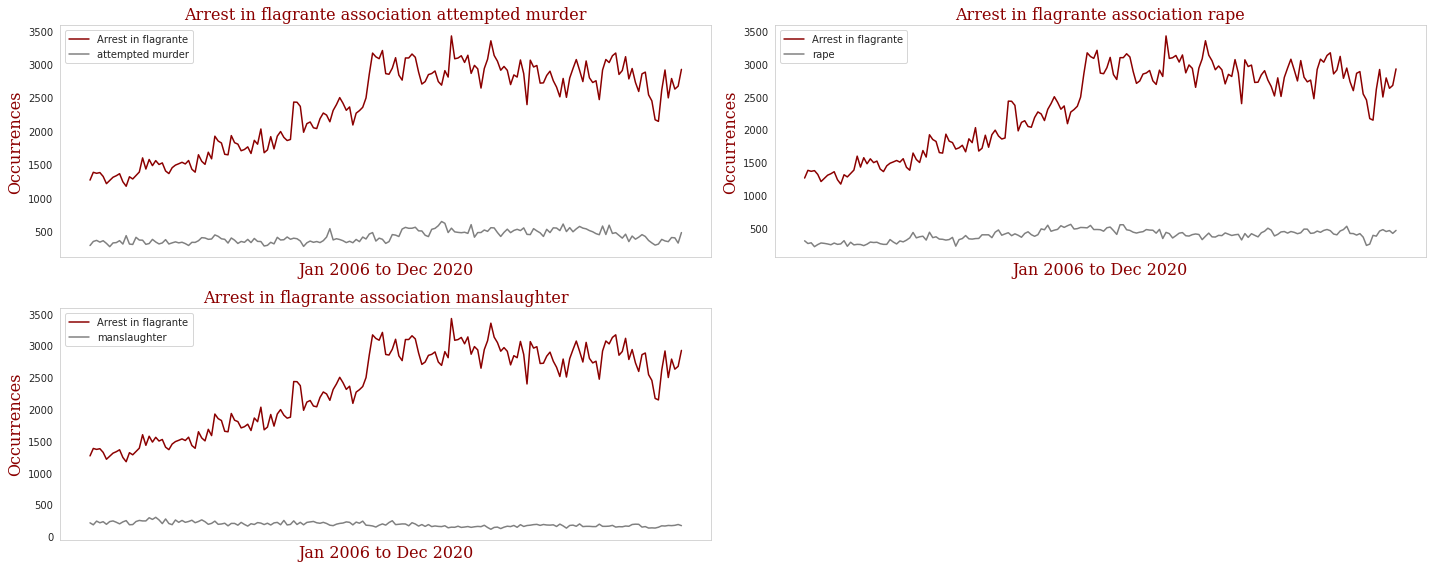

In [ ]:
#@title
rela = df_ccv[df_ccv.ano >= 2006]
rela = rela[['apf','tentat_hom','estupro','hom_culposo']].copy()
labeli = ['Arrest in flagrante','attempted murder', 'rape', 'manslaughter' ]
colum = 2
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
rows = math.ceil(float(rela.shape[1]) / colum)
for i, colunas in enumerate(rela.columns):
    if i>0:
        ax = fig.add_subplot(rows, colum, i);
        plt.plot(rela.index,rela['apf'], color='darkred', label = 'Arrest in flagrante');
        plt.plot(rela.index,rela[colunas], color = 'grey', label = labeli[i]);
        plt.title((labeli[0]+' association ' + labeli[i]),fontdict=fonter)
        plt.xlabel('Jan 2006 to Dec 2020',fontdict=fonter)
        plt.ylabel('Occurrences',fontdict=fonter)
        plt.legend()
        plt.grid(False)
        plt.xticks([])

plt.tight_layout() 

> As ocorrências com maiores indices de correlação não possui associação visual clara com crimes de apreenção em flagrante.

**Podemos concluir que os casos com apreenções em flagrantes associados aos crimes contra a vida fazem parte da distribuição geral e não tem participação direta nesta ocorrência.**


**Avaliando por meio da distribuição no tempo das aprrensões de menores temos:**

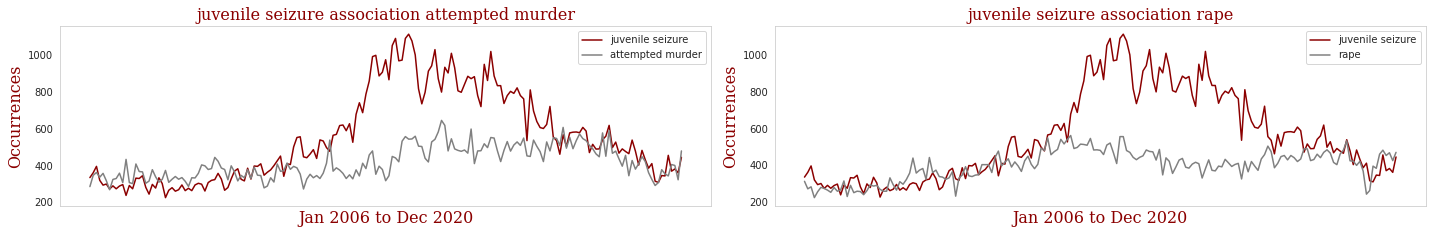

In [ ]:
#@title
rela = df_ccv[df_roubos.ano >= 2006]
rela = rela[['aaapai','tentat_hom','estupro']].copy()
labeli = ['juvenile seizure','attempted murder', 'rape']
colum = 2
fig = plt.figure(figsize=(20,6))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
rows = math.ceil(float(rela.shape[1]) / colum)
for i, colunas in enumerate(rela.columns):
    if i>0:
        ax = fig.add_subplot(rows, colum, i);
        plt.plot(rela.index,rela['aaapai'], color='darkred', label = 'juvenile seizure');
        plt.plot(rela.index,rela[colunas], color = 'grey', label = labeli[i]);
        plt.title((labeli[0]+' association ' + labeli[i]),fontdict=fonter)
        plt.xlabel('Jan 2006 to Dec 2020',fontdict=fonter)
        plt.ylabel('Occurrences',fontdict=fonter)
        plt.legend()
        plt.grid(False)
        plt.xticks([])

plt.tight_layout() 

> Podemos verificar que seguem tendências da distribuição das apreensões de menores. No entando, elas não atuam diretamentes uma com as outras neste caso, **apenas sofrem interferência.**

---


---

>>> ## Podemos concluir sobre os crimes contra vida que:

* O mês com maior ocorrências é em março.
* homicídios dolosos tendem a ter alta associação com violeência de letalidade.

* Os crime de `Lesão corporal Dolosa`, `Homicidio culposo` e `Pessoas desapárecidas` tem interação direta com os crime de `ameaca`, como tambem entre si.
* Dessa maneira podemos dize que as ocorrências de estupro pode ser composta e associadas entre os crimes `Homicídio doloso`, `encontro de corpos`, `Letalidade violenta`, `pessoas desaparecidas` e `Tentativa de homicídio`.

* A occorrência de `aaapai` possui associação com as ocorrências de `estupro` e `tentativa de homicídio`.

## **Análise to tráfico de Drogas**


In [5]:
df_tr = df[['ano','mes','extorsao', 'apreensao_drogas', 'posse_drogas', 
            'trafico_drogas', 'apreensao_drogas_sem_autor','apf','aaapai']].copy()

**O tráfico de drogas surgiu com a premissa de gerar recurso** para aqueles marginalizados em regiões periféricas do rio nos anos 80, como mostrado.
Dessa maneira, vamos análisar como este crime teve sua ditribuição durante os anos e **como ela impactou na vida das pessoas.**

Acima, alocamos as informações referentes ao tráfico de drogas. **Por meio deles avaliamos as ocorrências totais baseados na média durante todo espaço contido dos dados e obtivemos:**

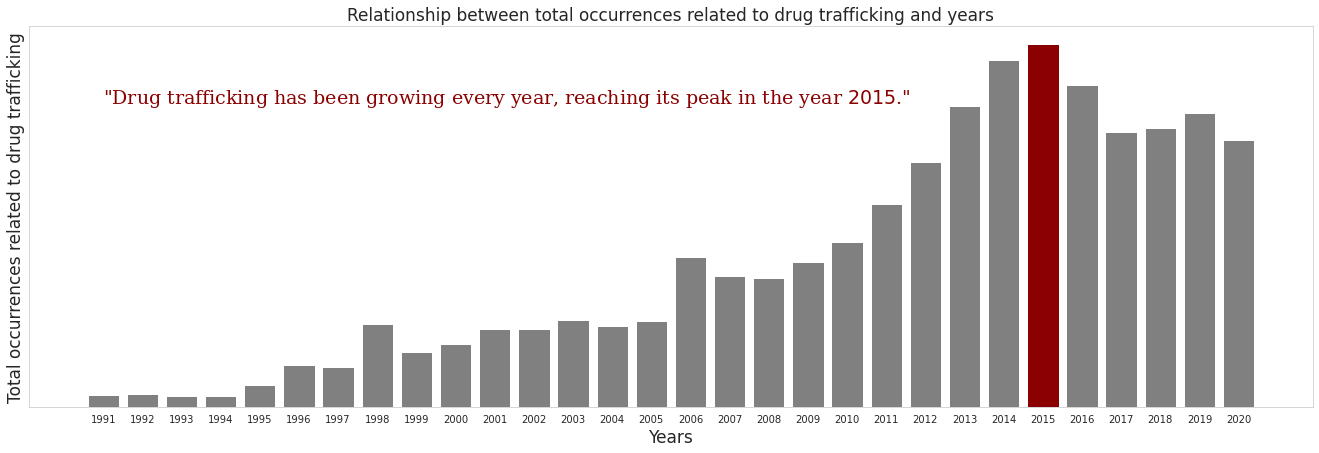

In [5]:
#@title
auxi = df_tr.drop(columns=['mes','apf','aaapai']).set_index(['ano']).mean(level=0).drop(index = 2021).copy()
k = []; x = []
for i in range(0,30):
    k.append(auxi.iloc[i,:].sum())
    x.append(1991+i)
font = {'weight': 'normal','size': 17,}
font2 = {'family': 'serif', 'color':'darkred','weight': 'normal','size': 19,}
colori = [];
for i in x:
    if i == 2015 :
        colori.append('darkred')
    else:
        colori.append('grey')
plt.figure(figsize=(23,7));
plt.bar(x,k,color=colori);
plt.yticks([]);
plt.xticks(x);
plt.xlabel('Years', fontdict=font);
plt.ylabel('Total occurrences related to drug trafficking', fontdict=font);
plt.grid(False);
plt.text(1991, 4100,
         r'"Drug trafficking has been growing every year, reaching its peak in the year $2015$."',
         fontdict=font2);
plt.title('Relationship between total occurrences related to drug trafficking and years', fontdict=font);

Nota-se que o tráfico mateve-se em crescimento ate o ano de $2015$ onde obteve seu **maior número médio em torno de 4900 ocorrência nos ano.**

>>Para analisarmos isoladamente vamos recorrer novamente aos índices de correlação.

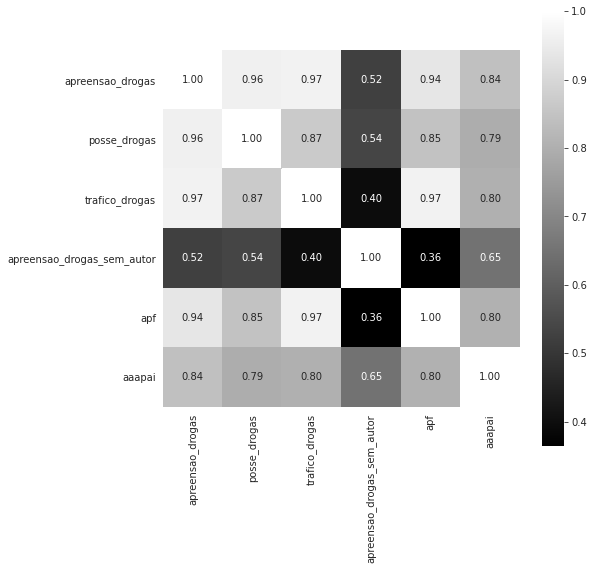

In [ ]:
#@title
plt.figure(figsize=(8,8))
sns.heatmap(df_tr.drop(columns=['ano','mes','extorsao']).corr(), fmt='.2f', cmap='gist_gray', square=True, linecolor='white', annot=True);

Por meio do índice de correlação podemos verificar associação entre:

* `apreensão de drogas` e (`posse de drogas`, `tráfico de drogas`, `prisão em flagrante` e `prisão de menor de idade`).

* `posse de drogas` e (`tráfico de drogas`, `prisão em flagrante` e `prisão de menor de idade`).

* `tráfico de drogas` e (`prisão em flagrante` e `prisão de menor de idade`).



### **Apreensão de drogas: Recolhimento de narcóticos sob posse**

Esta ocorrência trata das vezes que foram recolhidas drogas em algum meio. Quando associadas aos crimes recorrentes ao tráfico podemos verificar alta associação entre algumas ocorrências.

Para conseguirmos verificar por outro viés, o visual, **vamos verificar por meio da distribuição temporal desta ocorrência e identificar tendências:**

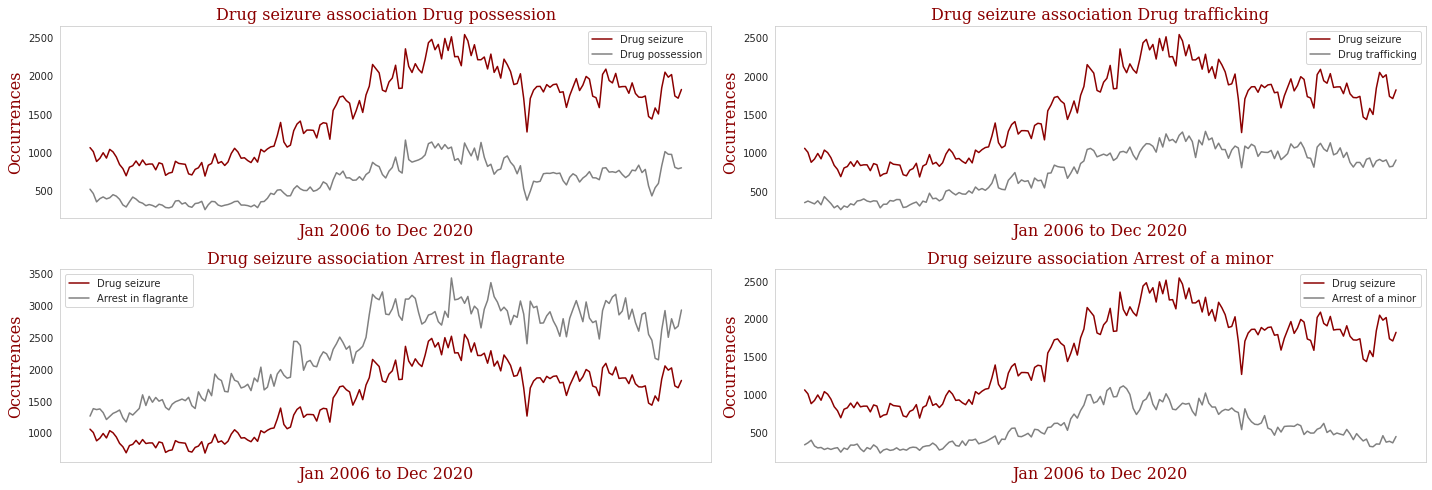

In [ ]:
#@title
rela = df_tr[df_tr.ano >= 2006]
rela = rela[['apreensao_drogas', 'posse_drogas','trafico_drogas','apf','aaapai']].copy()
labeli = ['Drug seizure', 'Drug possession', 'Drug trafficking', 'Arrest in flagrante', 'Arrest of a minor']
colum = 2
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
rows = math.ceil(float(rela.shape[1]) / colum)
for i, colunas in enumerate(rela.columns):
    if i>0:
        ax = fig.add_subplot(rows, colum, i);
        plt.plot(rela.index,rela['apreensao_drogas'], color='darkred', label = 'Drug seizure');
        plt.plot(rela.index,rela[colunas], color = 'grey', label = labeli[i]);
        plt.title((labeli[0]+' association ' + labeli[i]),fontdict=fonter)
        plt.xlabel('Jan 2006 to Dec 2020',fontdict=fonter)
        plt.ylabel('Occurrences',fontdict=fonter)
        plt.legend()
        plt.grid(False)
        plt.xticks([])

plt.tight_layout() 

>> Por meio da distribuição foi possível verificar associação **entre a `apreensão de drogas` possui visualmente e indicada pelo indice de correlação influência direta de todas as ocorrências avaliadas.**


### **Posse de drogas:ter uma ou mais drogas ilegais em posse de alguém**

Uma questão muito comum neste caso é qual a diferença entre posse e tráfico. Neste caso que varia é quantidade no momento da abordagem. 

Pensando nisso vamos avaliar a evolução de ocorrências de posse de drogas e como elas se relacionam entre si.

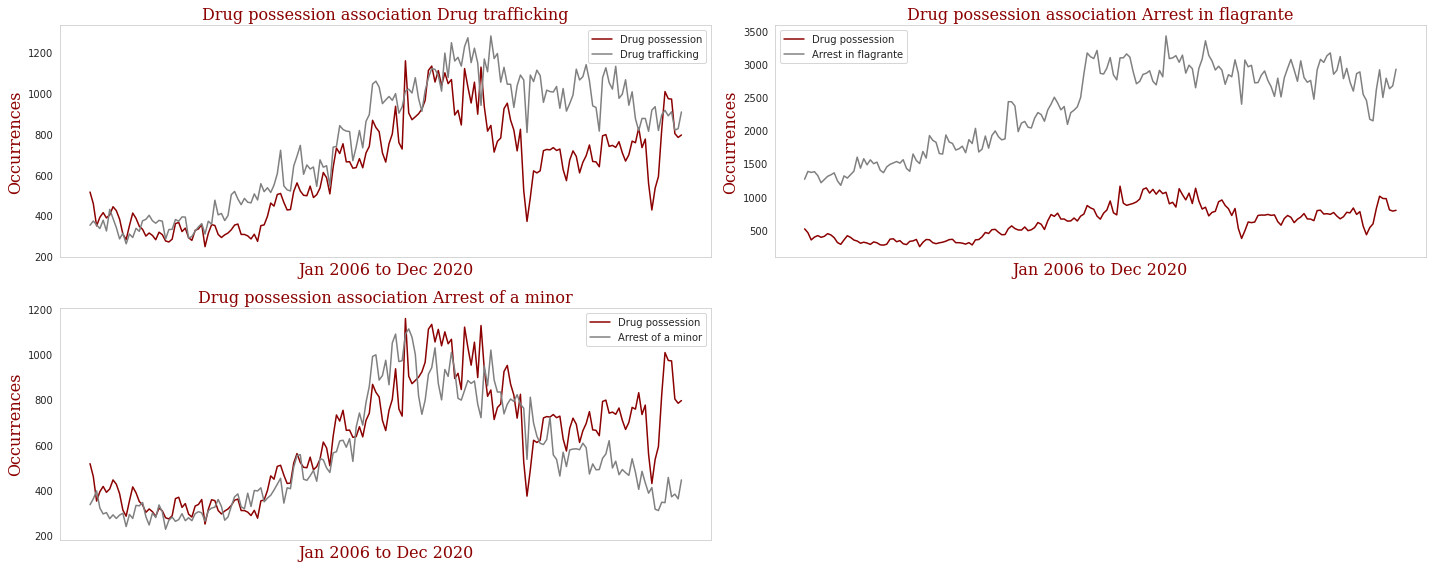

In [ ]:
#@title
rela = df_tr[df_tr.ano >= 2006]
rela = rela[['posse_drogas', 'trafico_drogas','apf','aaapai']].copy()
labeli = ['Drug possession', 'Drug trafficking', 'Arrest in flagrante', 'Arrest of a minor']
colum = 2
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
rows = math.ceil(float(rela.shape[1]) / colum)
for i, colunas in enumerate(rela.columns):
    if i>0:
        ax = fig.add_subplot(rows, colum, i);
        plt.plot(rela.index,rela['posse_drogas'], color='darkred', label = 'Drug possession');
        plt.plot(rela.index,rela[colunas], color = 'grey', label = labeli[i]);
        plt.title((labeli[0]+' association ' + labeli[i]),fontdict=fonter)
        plt.xlabel('Jan 2006 to Dec 2020',fontdict=fonter)
        plt.ylabel('Occurrences',fontdict=fonter)
        plt.legend()
        plt.grid(False)
        plt.xticks([])

plt.tight_layout()

>> Pode-se verificar que a ocorrência de `posse de drogas` se relaciona com as ocorrências de `tráfico de drogas`, mas não possui dependência. Em relação as ocorrência de `prisão em flagrante` e `prisão de menores` elas possuem associação embora **não são influenciadas entre si.**

### **Tráfico de drogas: venda, compra, produção, armazenamento, entrega ou fornecimento, mesmo que gratuito, de drogas sem autorização ou em desconformidade com a legislação**

Acredito que o título deixo claro a definição de tráfico, pesando nisso vamos avaliar como o tráfico se relaciona com prisões em flagrante e apreenções de menores.

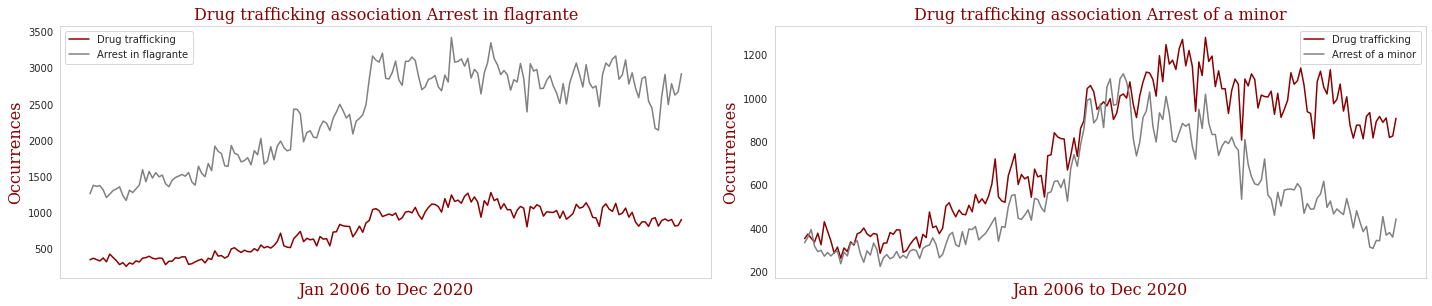

In [ ]:
#@title
#   Como existem valores faltante setamos o ano que eles foram computados
rela = df_tr[df_tr.ano >= 2006]
rela = rela[['trafico_drogas','apf','aaapai']].copy()

# plot
labeli = ['Drug trafficking', 'Arrest in flagrante', 'Arrest of a minor']
colum = 2
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
rows = math.ceil(float(rela.shape[1]) / colum)
for i, colunas in enumerate(rela.columns):
    if i>0:
        ax = fig.add_subplot(rows, colum, i);
        plt.plot(rela.index,rela['trafico_drogas'], color='darkred', label = 'Drug trafficking');
        plt.plot(rela.index,rela[colunas], color = 'grey', label = labeli[i]);
        plt.title((labeli[0]+' association ' + labeli[i]),fontdict=fonter)
        plt.xlabel('Jan 2006 to Dec 2020',fontdict=fonter)
        plt.ylabel('Occurrences',fontdict=fonter)
        plt.legend()
        plt.grid(False)
        plt.xticks([])

plt.tight_layout()

>> Podemos verificar que o `tráfico de drogas` **tem relação direta com `apreensão de menores`** e tem influência nas apreensões em flagrante, mas esta não se associam dietamente.


### **Avaliação dos mêses em relação às ocorrências**

Por fim, vamos avaliar qual mês do ano apresenta maior quantidade média de ocorrências relacionado ao tráfico de drogas.

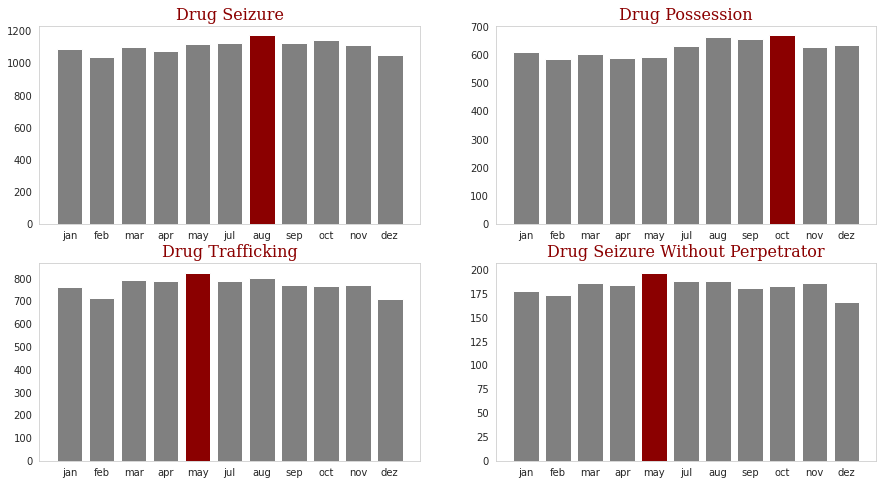

In [6]:
# contagem e atuação por mês
#@title
mes_tr = df_tr.set_index(['mes']).mean(level=0).drop(columns=['ano','apf','aaapai','extorsao'])
fonter = {'family': 'serif', 'color':'darkred','weight': 'normal','size': 16,}
title = ['Drug Seizure', 'Drug Possession', 'Drug Trafficking', 'Drug Seizure Without Perpetrator']
colum = 2
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
rows = math.ceil(float(mes_tr.shape[1]) / colum)
for i, colunas in enumerate(mes_tr.columns):
    ax = fig.add_subplot(rows, colum, i + 1)
    max = []
    for j in mes_tr[colunas]:
        if j == mes_tr[colunas].max() :
             max.append('darkred')
        else:
             max.append('grey')
    plt.title(title[i].title(),fontdict=fonter)
    plt.bar(mes_tr.index,mes_tr[colunas], color=max);
    plt.grid(False)

>>> ## **Podemos conluir sobre o Tráfico de drogas que:**

* `apreensão de drogas` e (`posse de drogas`, `tráfico de drogas`, `prisão em flagrante` e `prisão de menor de idade`) possuem associação direta com estas ocorrêncuias e  sofre inflência direta de todas estas.

* `posse de drogas` e (`tráfico de drogas`, `prisão em flagrante` e `prisão de menor de idade`) se relaciona com as ocorrências de `tráfico de drogas`, mas não possui dependência. Em relação as ocorrência de `prisão em flagrante` e `prisão de menores` elas possuem associação embora **não são influenciadas entre si.**

* `tráfico de drogas` e (`prisão em flagrante` e `prisão de menor de idade`) **tem relação direta com `apreensão de menores`** e tem influência nas apreensões em flagrante, mas esta não se associam dietamente.

* Como a ocorrência de `apreensão de drogas` sofre influência da maioria das ocorrência relacionadas ao tráfico, podemos dizer que o mês com maiores tendêcias de ocorrências de tráfico seja o mês de **Agosto**.



## **Associação entre crimes contra vida e roubos**

Muitas vezes um roubo é seguido de muita violência e até mesmo a morte. Pensando nisso, foi mostrado pelo indice de correlação que no estado do Rio de Janeiro **há essa associação entre roubos e crimes contra a vida.**

Recordando parte do indice de correlação:

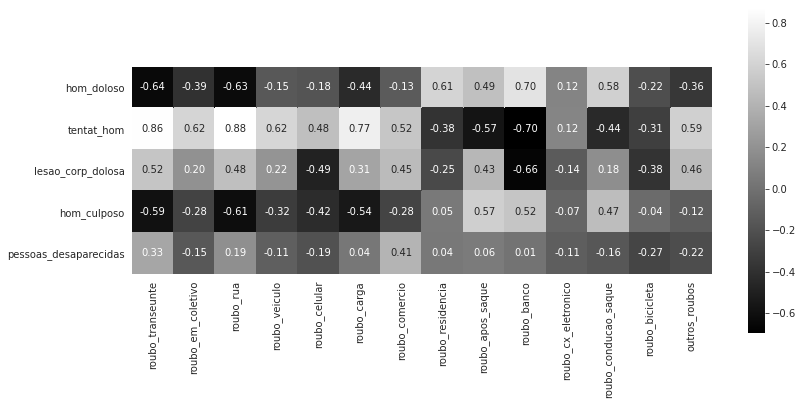

In [36]:
#@title
y = df_cr.drop(columns=['ano','mes']).corr()
plt.figure(figsize = (13,6) )
sns.heatmap(y.drop(columns=['total_roubos']).iloc[[0,5,6,8,11],14:], fmt='.2f', cmap='gist_gray', square=True, linecolor='white', annot=True);

Pode verificar que há uma alta correlação entre:

* `tentativa de homicídio` e (`Roubo trnaseunte`,`roubo de rua` e `roubo carga`)

> Dessa forma, vamos iniciar um dataset com as colunas ao qual desejamos analisar.

In [39]:
df_cr = df[['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 
            'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
            'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa', 'ameaca',
            'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada','roubo_transeunte', 
            'roubo_em_coletivo', 'roubo_rua','roubo_veiculo', 'roubo_celular', 
            'roubo_carga', 'roubo_comercio', 'roubo_residencia','roubo_apos_saque',
            'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
            'roubo_bicicleta', 'outros_roubos','total_roubos']].copy()       

Dessa maneira vamos avaliar a associação entre eles por meio da distribuição temporal. **Onde gostariamos de analisar visualmente tendências entre as ocorrências com alta correlação.**

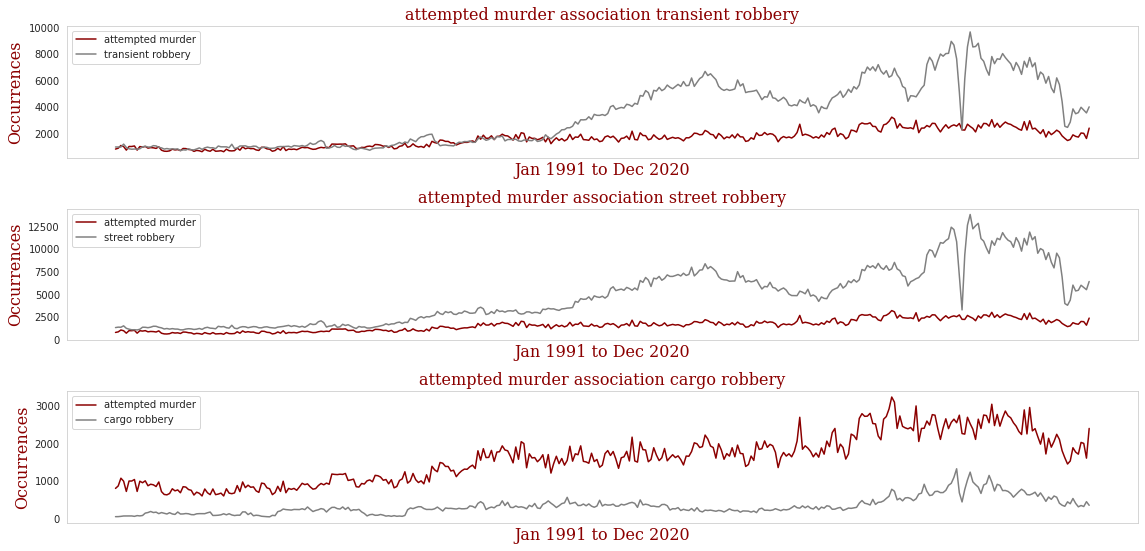

In [46]:
#@title
rela = df_cr[df_tr.ano >= 1991]
rela = rela[['tentat_hom','roubo_transeunte','roubo_rua','roubo_carga']].copy()
labeli = ['attempted murder', 'transient robbery', 'street robbery', 'cargo robbery']
colum = 1
fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
rows = math.ceil(float(rela.shape[1]) / colum)
for i, colunas in enumerate(rela.columns):
    if i>0:
        ax = fig.add_subplot(rows, colum, i);
        plt.plot(rela.index,rela['tentat_hom']*5, color='darkred', label = 'attempted murder');
        plt.plot(rela.index,rela[colunas], color = 'grey', label = labeli[i]);
        plt.title((labeli[0]+' association ' + labeli[i]),fontdict=fonter)
        plt.xlabel('Jan 1991 to Dec 2020',fontdict=fonter)
        plt.ylabel('Occurrences',fontdict=fonter)
        plt.legend()
        plt.grid(False)
        plt.xticks([])

plt.tight_layout() 

**Embora o indice de correlção seja alto, ao analisarmos visualmente a distribuição podemos verificar que não há nenhuma relação que gere a tendência geral, nem participe da distribuição geral.**

---
#Conclusões

* Portanto podemos dizer que o **carnaval influência nos roubos do estado**, onde podemos verificar o mês com maior média de ocorrências sendo o de março. Quando relacionamos **menores de idade** e roubos a maior associação **trata-se de roubos comerciais.**

>>Quando tratamos de `ameacas`, vemos uma alta associação dependência entre `Lesão corporal Dolosa`, `Homicidio culposo` e `Pessoas desapárecidas`.

>O crime de `estupro` é uma distribuição que sofre influência direta dos crimes `Homicídio doloso`, `encontro de corpos`, `Letalidade violenta`, `pessoas desaparecidas` e `Tentativa de homicídio`, como também podem ser associadas.

Quando tratamos de tráfico de drogas pode-se visuazlizar associação direta com estas ocorrêncuias de (`posse de drogas`, `tráfico de drogas`, `prisão em flagrante` e `prisão de menor de idade`) com a  `apreensão de drogas`.



---

---

---

---



